# **AI Lab Project**

In [109]:
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif




In [2]:
df = pd.read_csv('Dataset.txt',sep=',')
da = pd.read_csv('Attack_types.txt',sep=' ')

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
da.head()

,attack_category,attack_type
0,apache2,dos
1,back,dos
2,mailbomb,dos
3,processtable,dos
4,snmpgetattack,dos


In [5]:
df.shape

(125973, 43)

In [6]:
da.shape

(41, 2)

In [7]:

df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'occurance'],
      dtype='object')

In [8]:
da.columns

Index(['attack_category', 'attack_type'], dtype='object')

In [9]:
df = df.merge(da,on='attack_category',how='left')

In [10]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,NaN
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,NaN
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,NaN
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,NaN


In [11]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'occurance',
       'attack_type'],
      dtype='object')

In [12]:
df.shape

(125984, 44)

In [13]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,NaN
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,NaN
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,NaN
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,NaN


In [14]:
df['attack_category'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [15]:
df['attack_type'].unique()


array([nan, 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [16]:
df.shape

(125984, 44)

In [17]:
nan_count = df.isna().sum()
print(nan_count)

duration                           0
protocol_type                      0
service                            0
flag                               0
src_bytes                          0
dst_bytes                          0
land                               0
wrong_fragment                     0
urgent                             0
hot                                0
num_failed_logins                  0
logged_in                          0
num_compromised                    0
root_shell                         0
su_attempted                       0
num_root                           0
num_file_creations                 0
num_shells                         0
num_access_files                   0
num_outbound_cmds                  0
is_host_login                      0
is_guest_login                     0
count                              0
srv_count                          0
serror_rate                        0
srv_serror_rate                    0
rerror_rate                        0
s

In [18]:
df['attack_type']=df['attack_type'].fillna('normal')

In [19]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [20]:
df['attack_type'].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [21]:
counts = df['attack_type'].value_counts()
print(counts)

normal    67343
dos       45927
probe     11656
r2l        1006
u2r          52
Name: attack_type, dtype: int64


In [22]:
null_count = df.isna().sum()
print(null_count)

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [23]:
df.drop('attack_category',axis=1,inplace=True)


In [24]:
df.shape

(125984, 43)

In [25]:
print(df[df.duplicated()])

        duration protocol_type service flag  src_bytes  dst_bytes  land  \
6087           0           tcp   imap4   SF          0          0     0   
12293          0           tcp   imap4   SF          0          0     0   
17675         41           tcp   imap4   SF       1334        162     0   
17875          0           tcp   imap4   S1       1492     649186     0   
21548          0           tcp   imap4   SH          0          0     0   
26928          0          icmp   eco_i   SF          8          0     0   
34013          0          icmp   eco_i   SF          8          0     0   
58310          0           tcp   imap4   SH          0          0     0   
64560          0           tcp   imap4   SH          0          0     0   
64813          0           tcp   imap4   SF          0          0     0   
79823          0          icmp   eco_i   SF          8          0     0   
79867          0          icmp   ecr_i   SF          8          0     0   
83611          0         

In [26]:
print(df.duplicated().sum())

20


In [27]:
df=df.drop_duplicates()

In [28]:
df.shape

(125964, 43)

In [29]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, occurance, attack_type]
Index: []

[0 rows x 43 columns]


In [30]:
print(df.duplicated().sum())

0


In [31]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [32]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'occurance', 'attack_type'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125964 entries, 0 to 125983
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125964 non-null  int64  
 1   protocol_type                125964 non-null  object 
 2   service                      125964 non-null  object 
 3   flag                         125964 non-null  object 
 4   src_bytes                    125964 non-null  int64  
 5   dst_bytes                    125964 non-null  int64  
 6   land                         125964 non-null  int64  
 7   wrong_fragment               125964 non-null  int64  
 8   urgent                       125964 non-null  int64  
 9   hot                          125964 non-null  int64  
 10  num_failed_logins            125964 non-null  int64  
 11  logged_in                    125964 non-null  int64  
 12  num_compromised              125964 non-null  int64  
 13 

In [34]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125964.000000,1.259640e+05,1.259640e+05,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,...,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000
mean,287.165166,4.557000e+04,1.978053e+04,0.000198,0.022689,0.000111,0.204423,0.001223,0.395764,0.279270,...,115.661125,0.521207,0.082957,0.148318,0.032545,0.284473,0.278504,0.118840,0.120248,19.504755
std,2604.607223,5.870541e+06,4.021413e+06,0.014087,0.253539,0.014367,2.150045,0.045241,0.489016,23.942897,...,110.702526,0.448947,0.188927,0.308924,0.112567,0.444793,0.445679,0.306567,0.319469,2.289757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [35]:
unique_values = df.nunique()
print(unique_values)

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [36]:
df['num_outbound_cmds'].unique()

array([0], dtype=int64)

In [37]:
for col in df.columns:
    if df[col].nunique() == 1:
        df.drop(col, axis=1, inplace=True)

In [38]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [39]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'occurance',
       'attack_type'],
      dtype='object')

In [40]:
unique_value1=df.nunique()
print(unique_value1)

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate                  62
same_srv_rate               

In [41]:
df.shape

(125964, 42)

In [42]:
types = df.dtypes
print(types)


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

In [43]:
non_num_cols = df.select_dtypes(include=['object']).columns.tolist()

In [44]:
le = LabelEncoder()

In [45]:
df[non_num_cols] = df[non_num_cols].apply(le.fit_transform)

In [46]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,1
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,1
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,0
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,1
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,1


In [47]:
print(df.dtypes)

duration                         int64
protocol_type                    int32
service                          int32
flag                             int32
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

In [48]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [49]:
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

In [50]:
df_scaled.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
0,-0.110253,-0.124905,-0.686859,0.751153,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,...,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402,0.216288,0.390258
1,-0.110253,2.219539,0.781356,0.751153,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,...,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,-1.967359,0.390258
2,-0.110253,-0.124905,1.087234,-0.736170,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,...,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,-0.220441,-1.139538
3,-0.110253,-0.124905,-0.442157,0.751153,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,...,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100,0.653017,0.390258
4,-0.110253,-0.124905,-0.442157,0.751153,-0.007729,-0.004814,-0.014089,-0.08949,-0.007736,-0.095079,...,1.066483,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,0.653017,0.390258


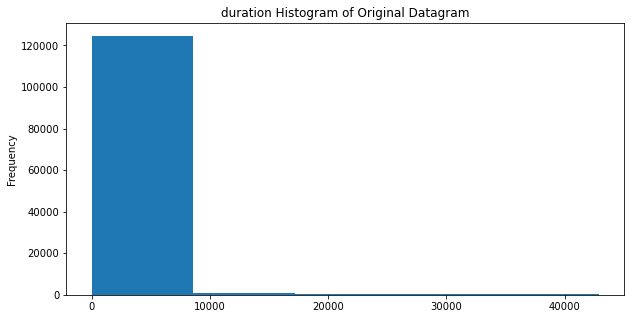

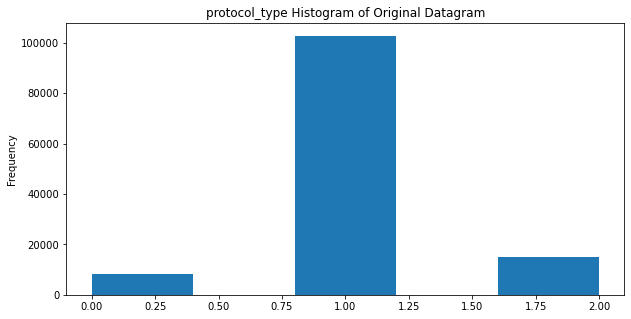

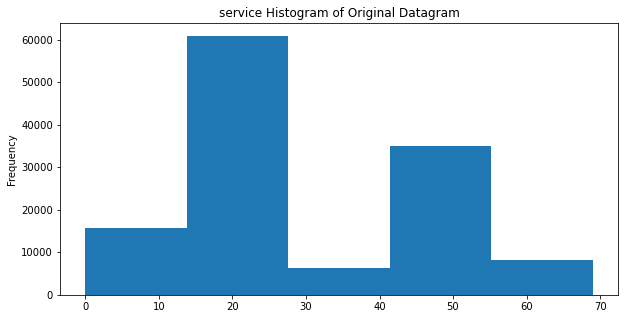

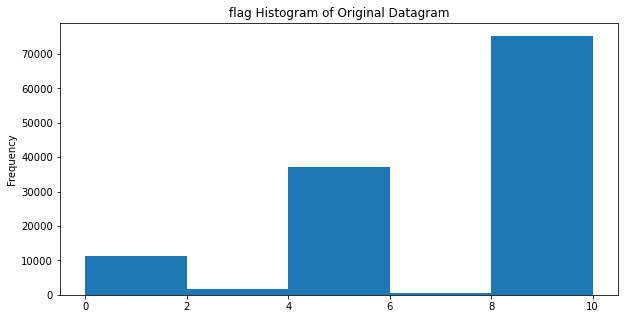

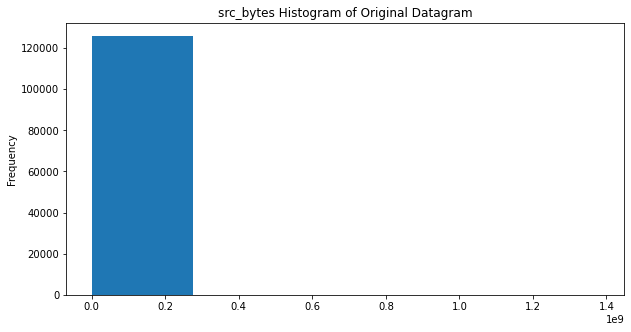

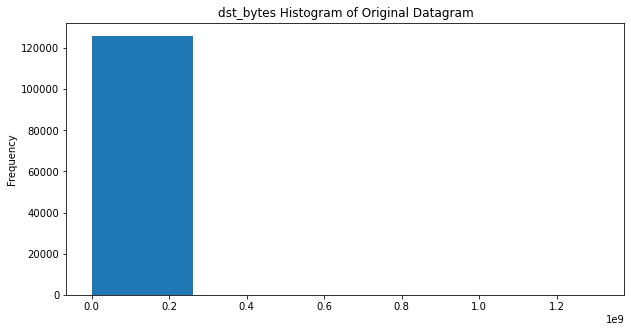

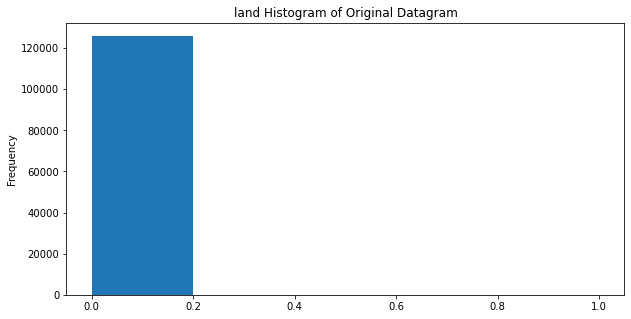

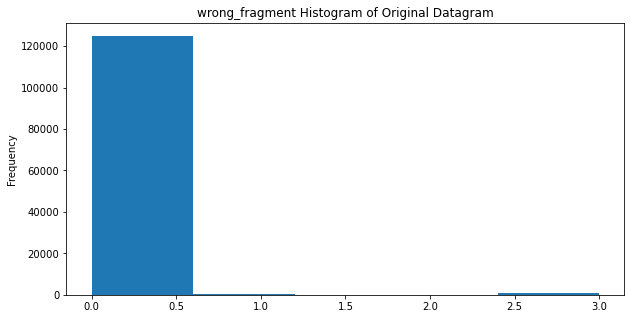

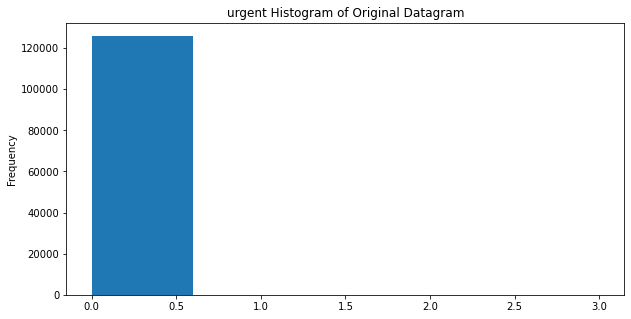

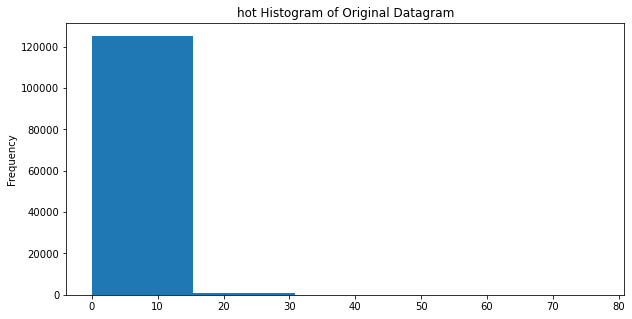

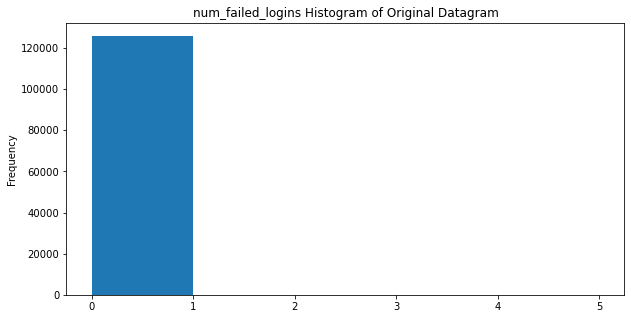

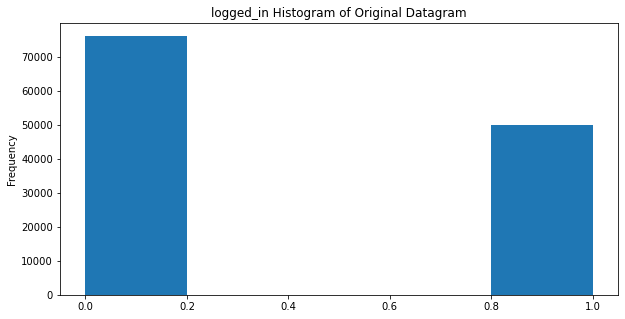

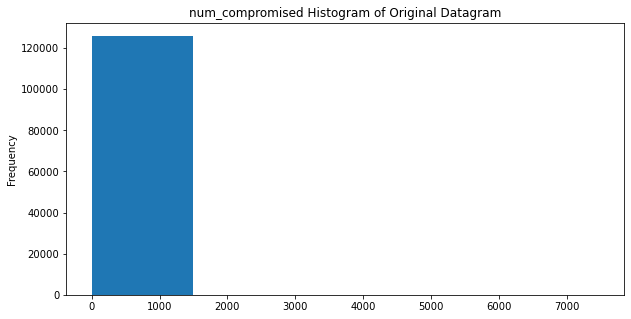

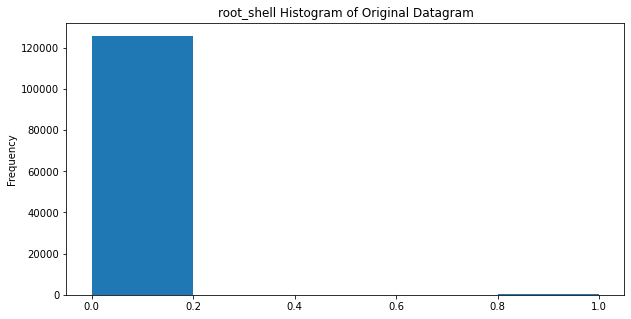

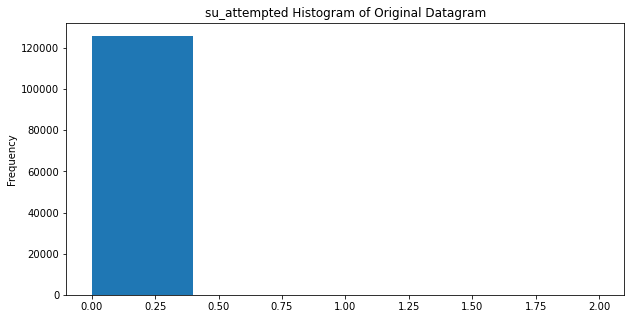

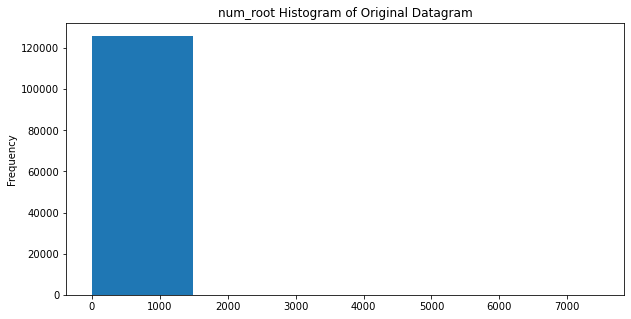

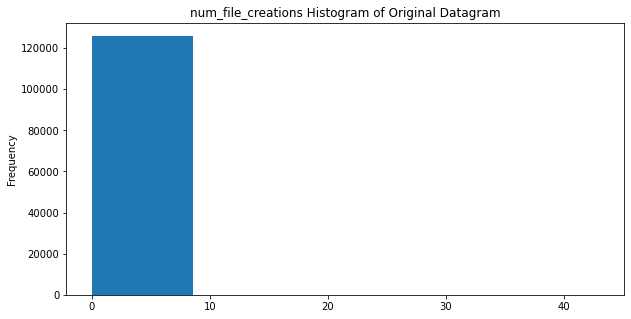

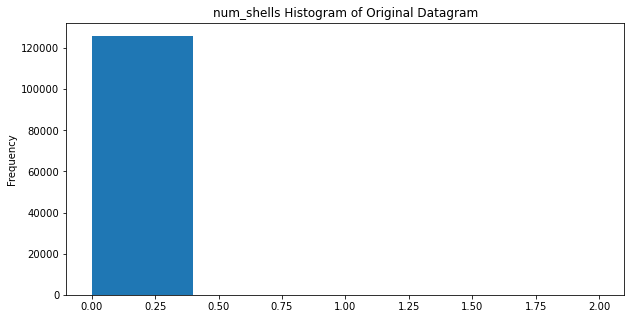

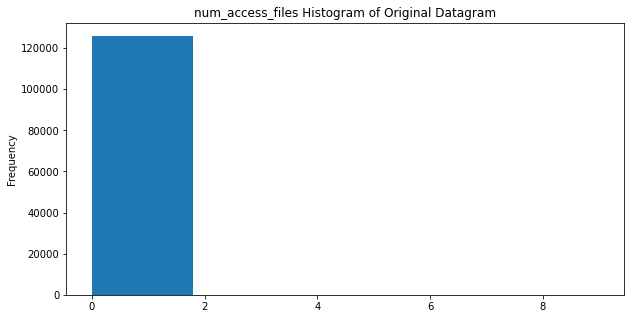

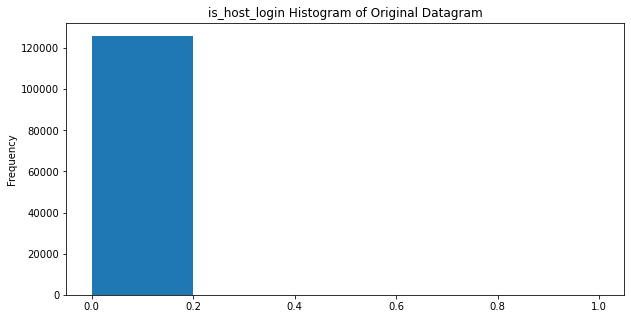

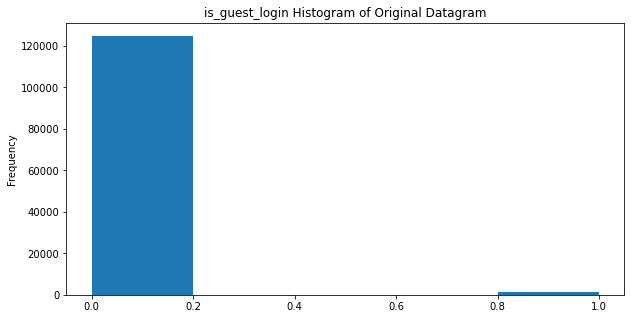

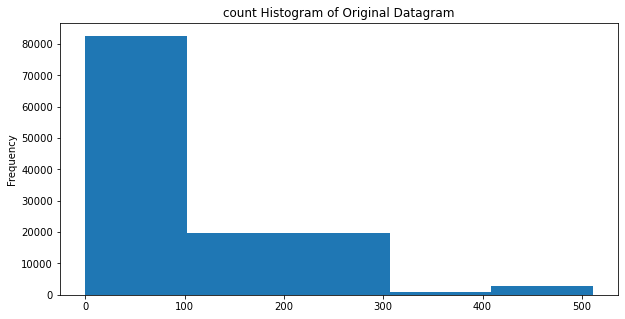

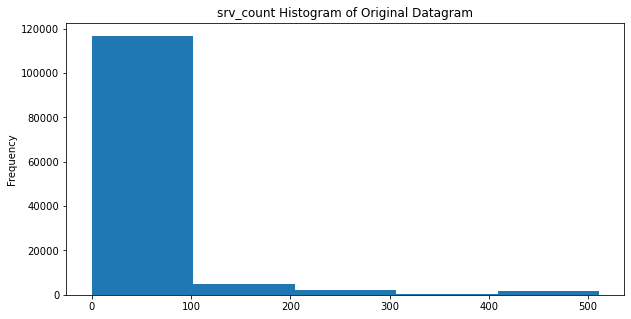

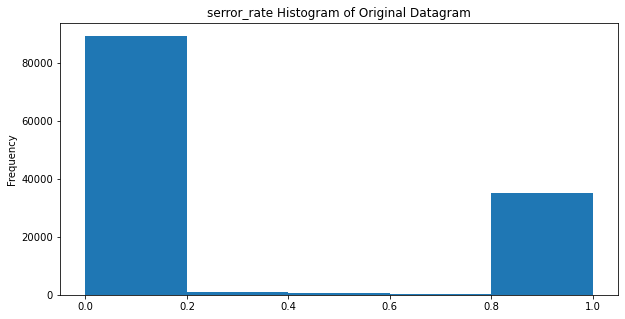

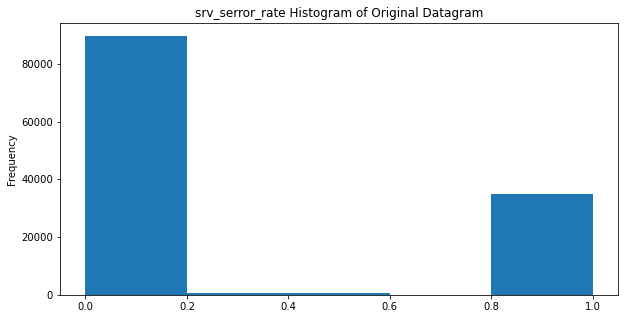

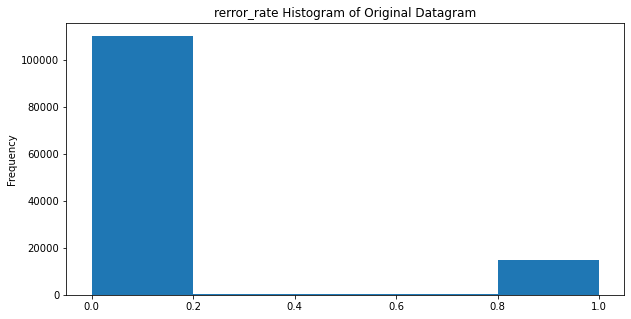

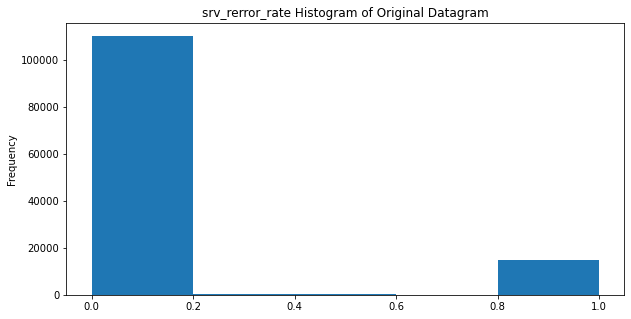

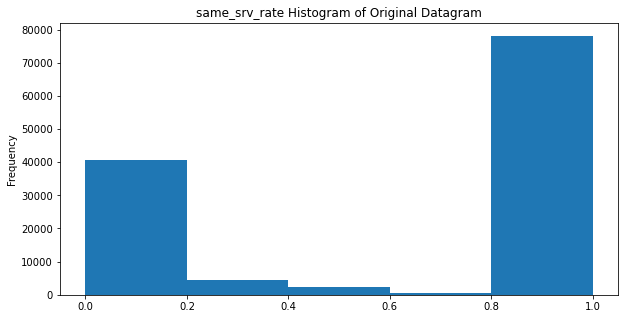

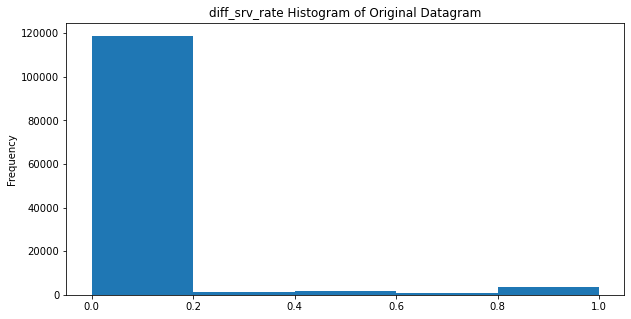

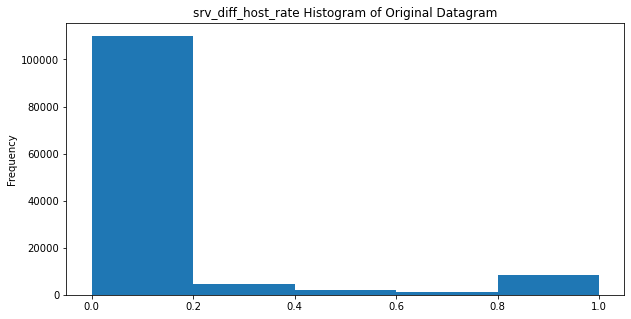

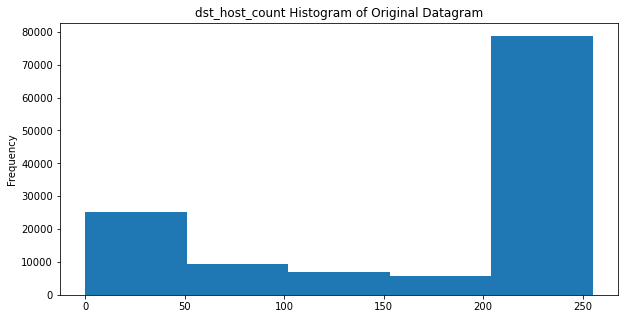

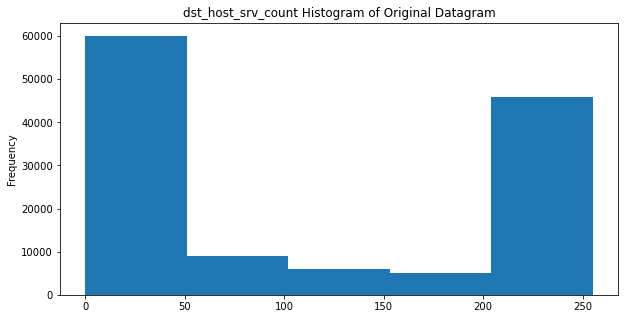

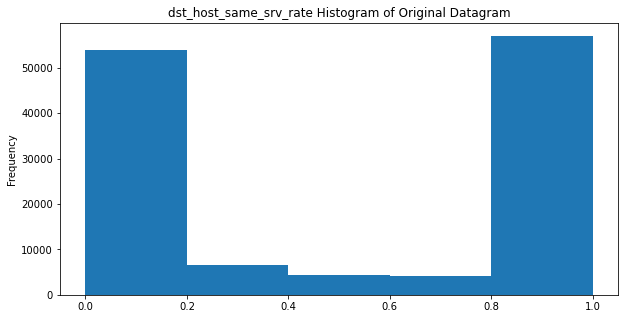

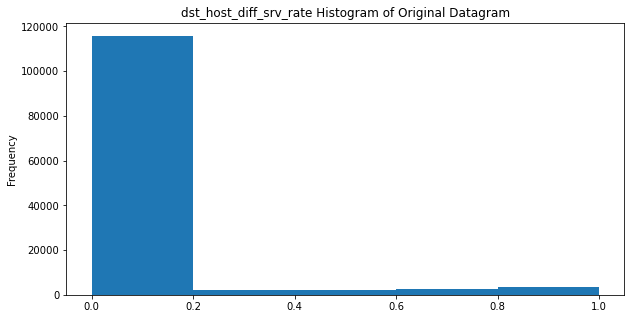

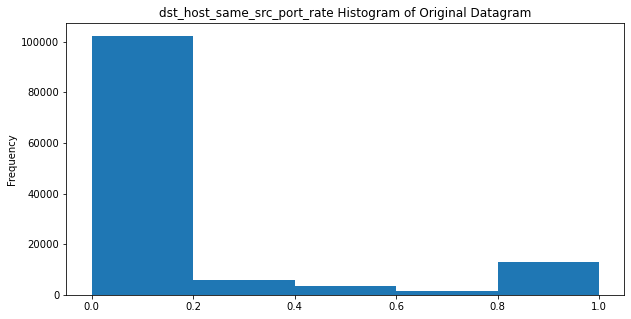

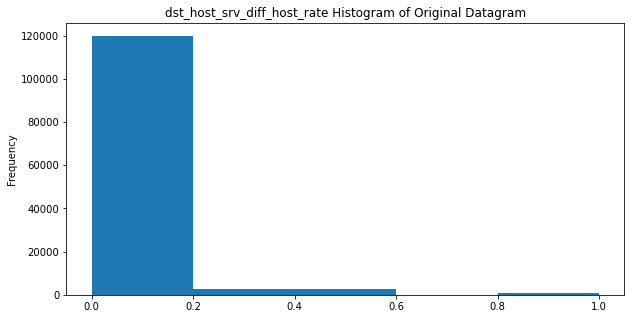

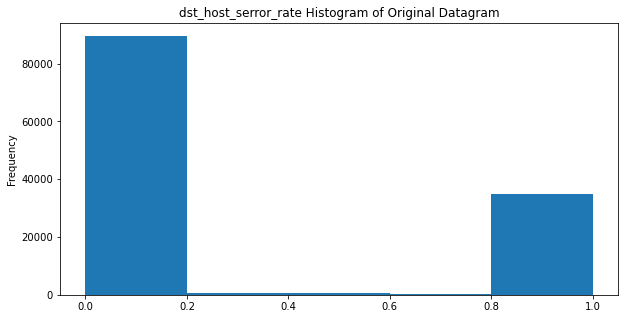

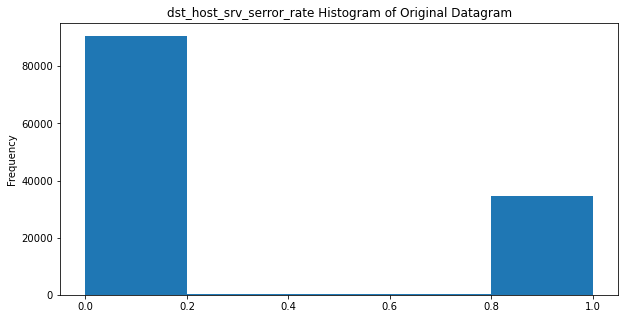

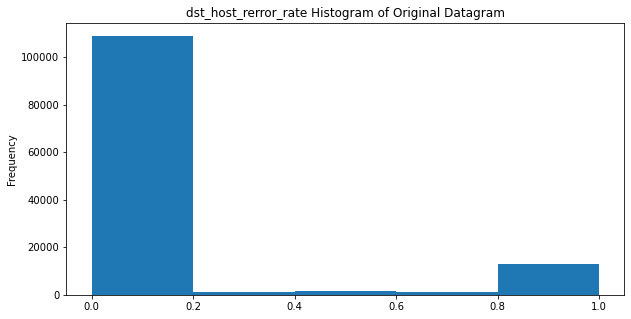

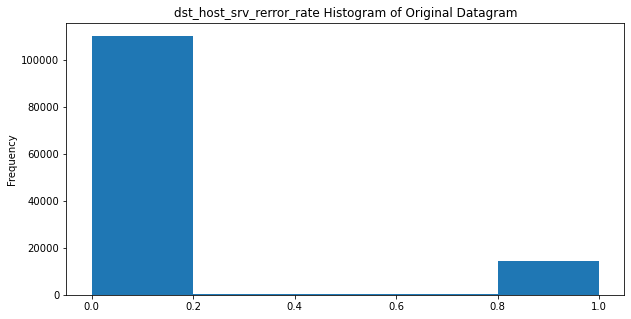

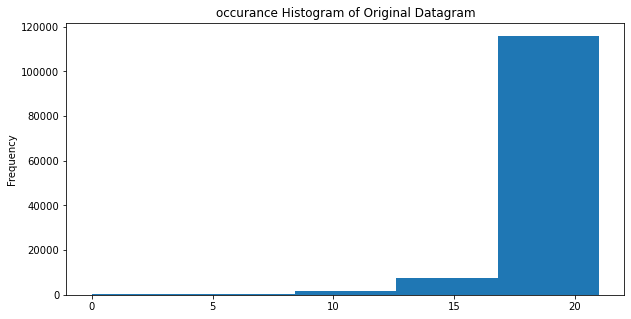

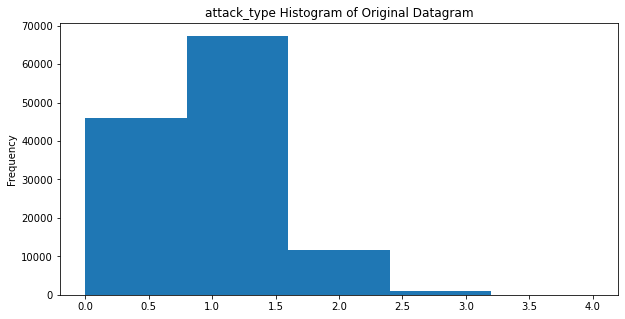

In [51]:
for col in df.columns:
    plt.figure(figsize=(10,5))
    plt.hist(df[col],bins=5)
    plt.ylabel("Frequency")
    plt.title(col +" Histogram of Original Datagram")
    plt.show()

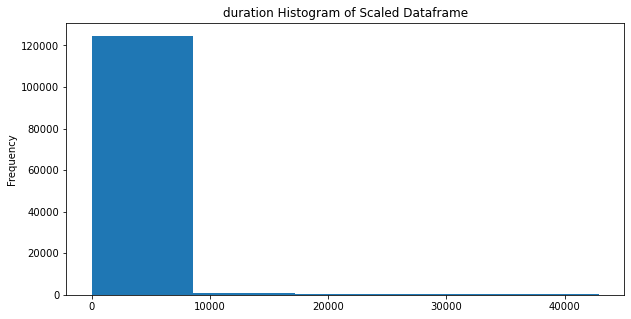

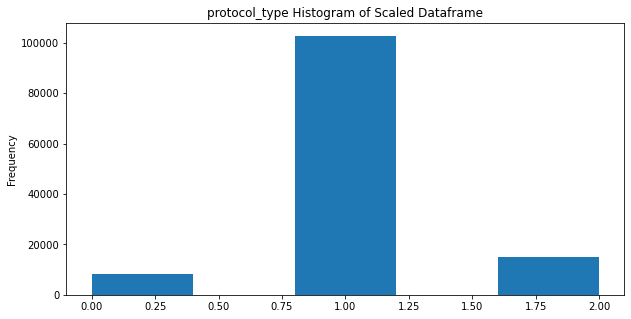

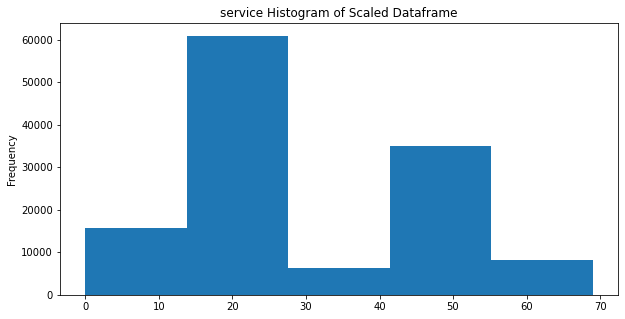

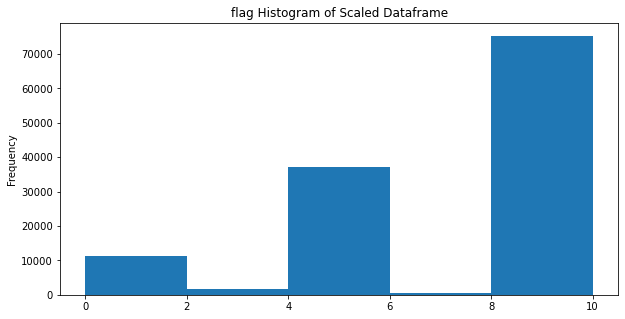

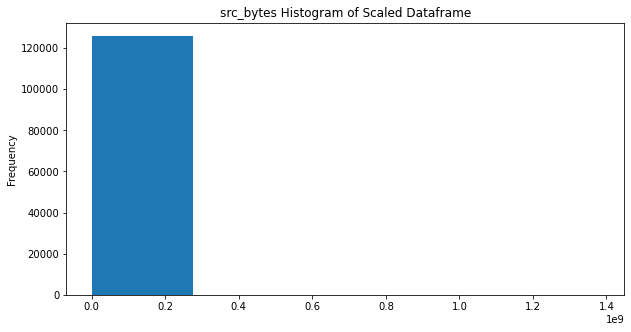

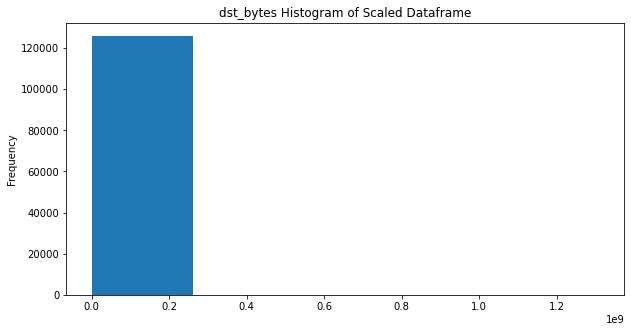

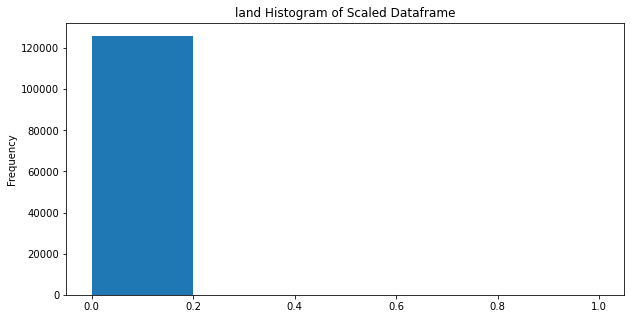

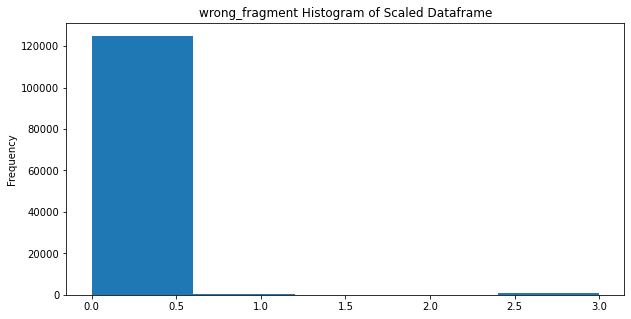

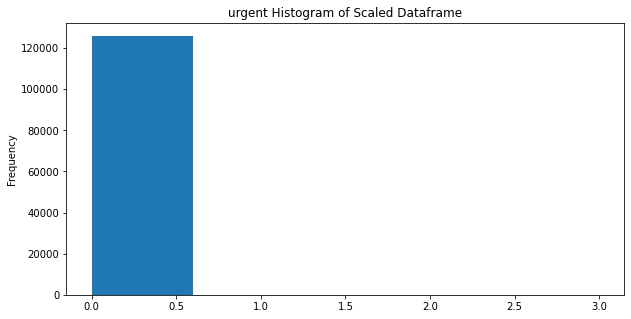

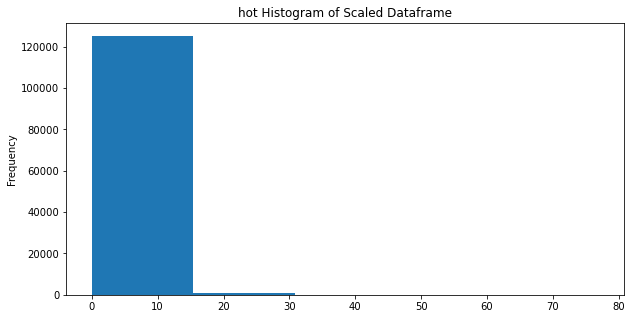

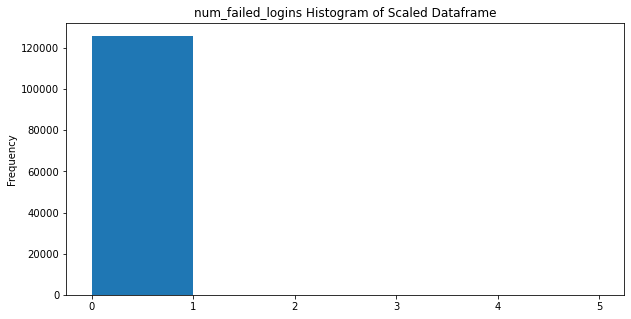

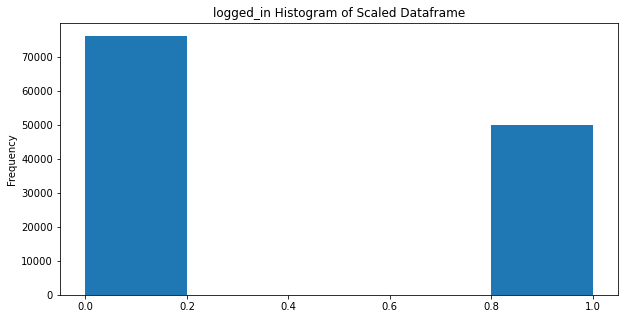

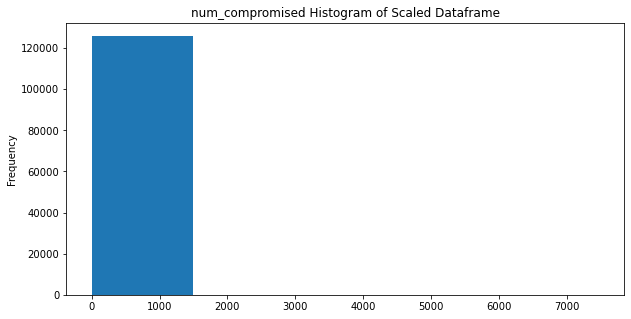

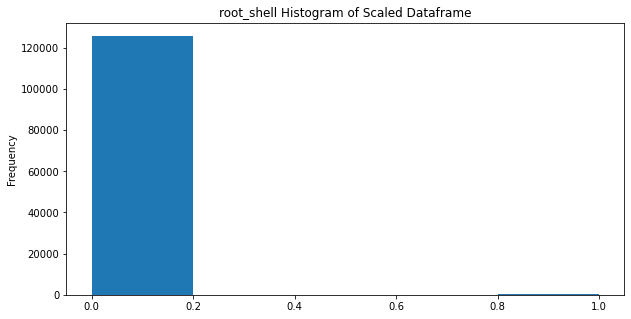

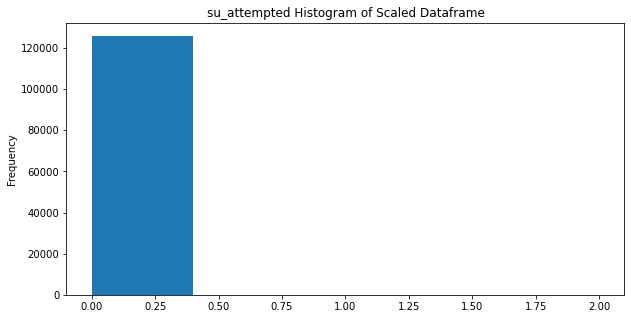

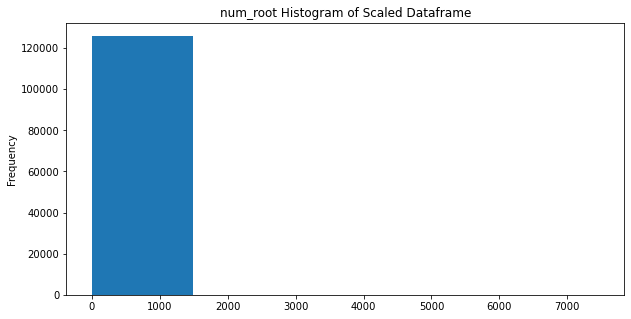

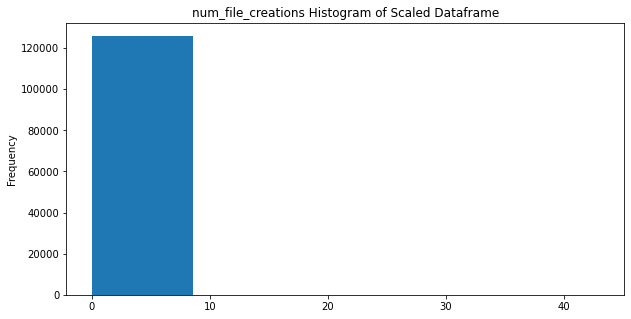

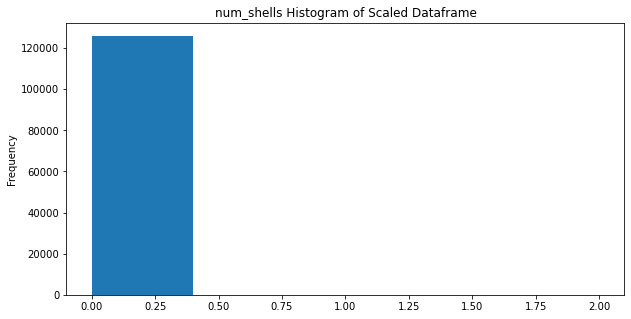

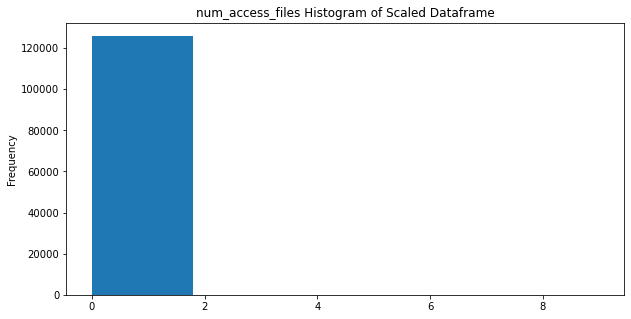

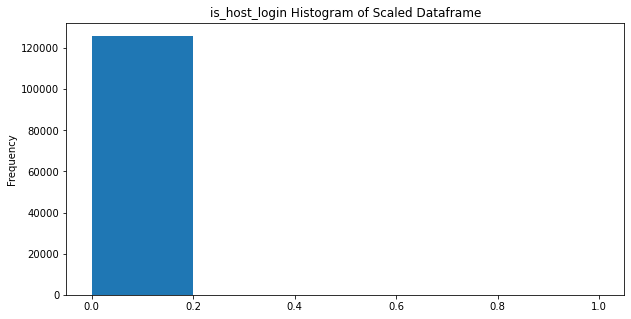

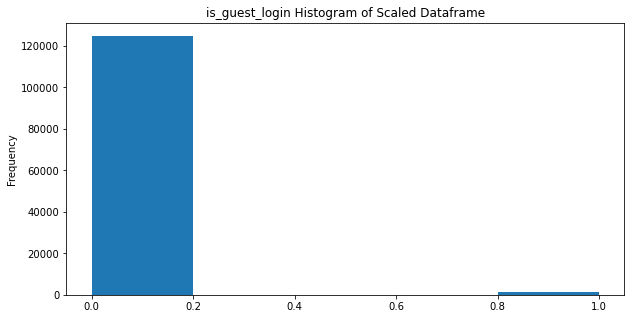

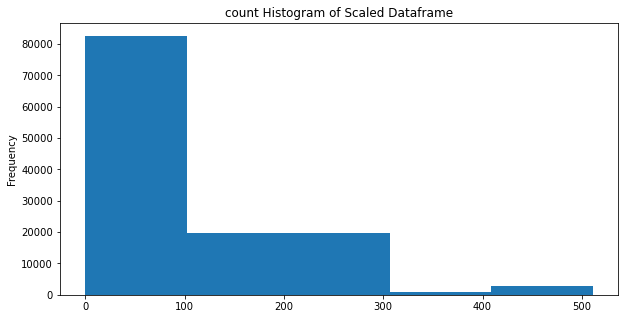

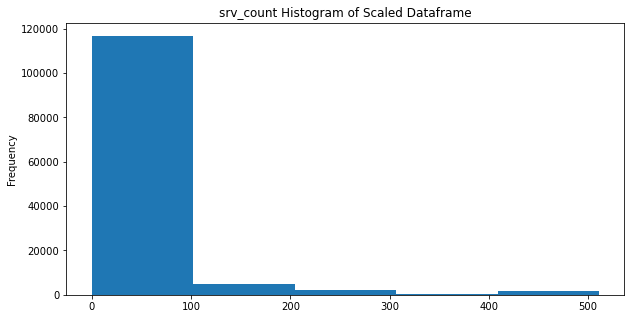

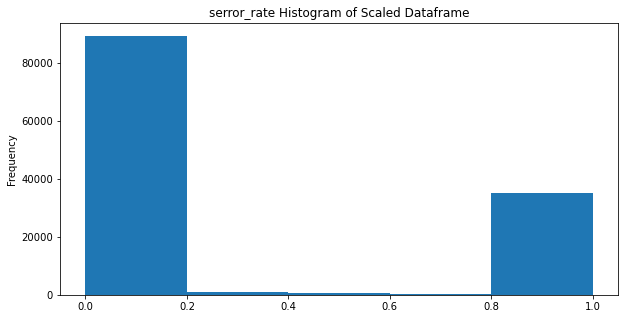

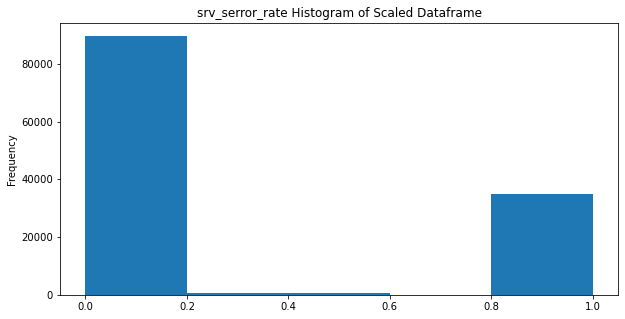

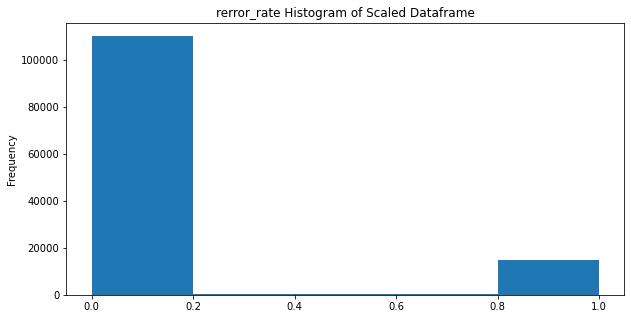

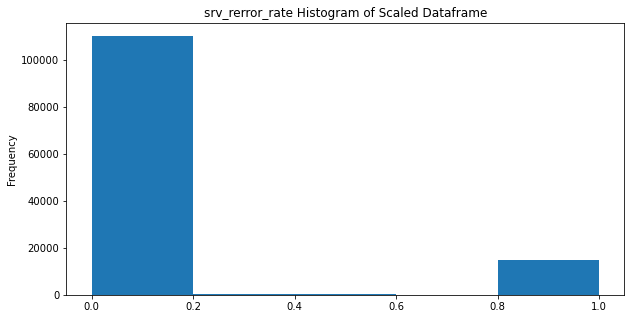

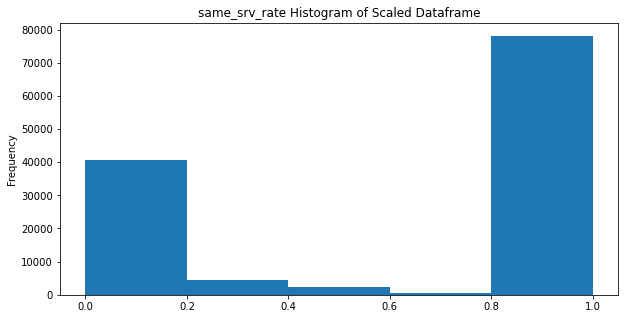

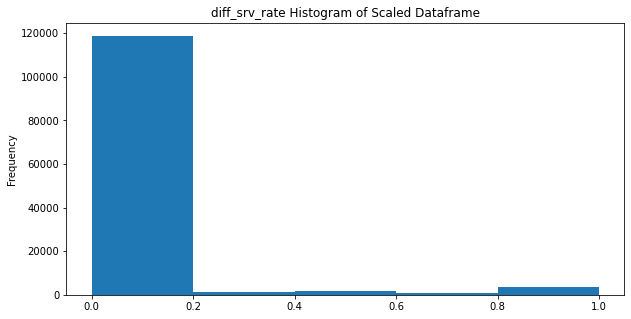

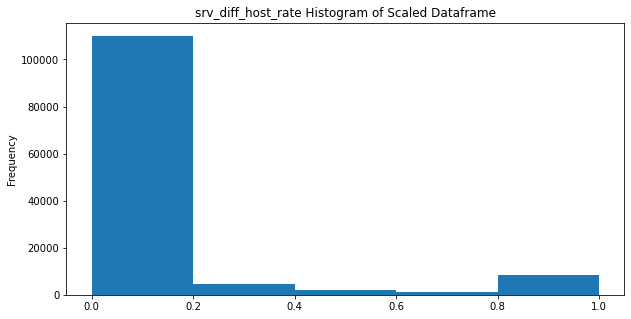

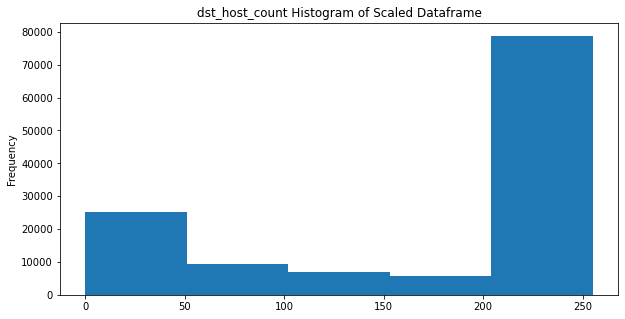

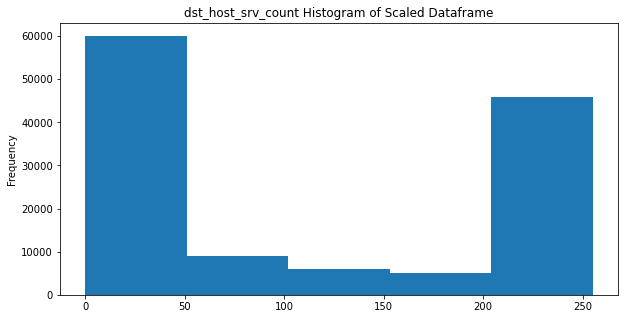

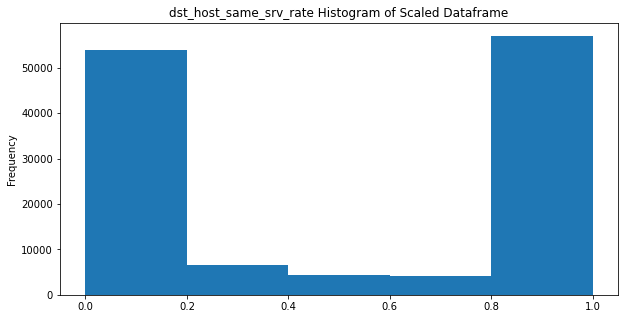

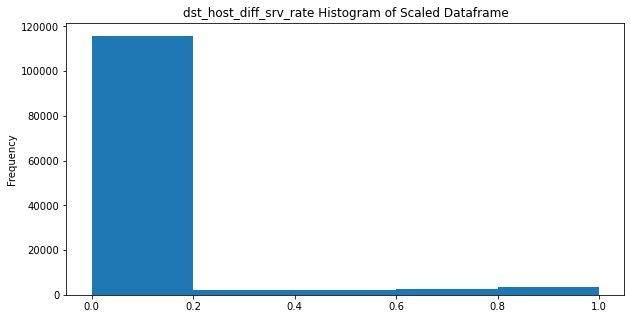

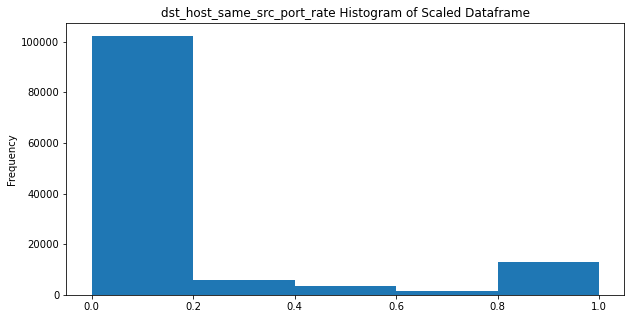

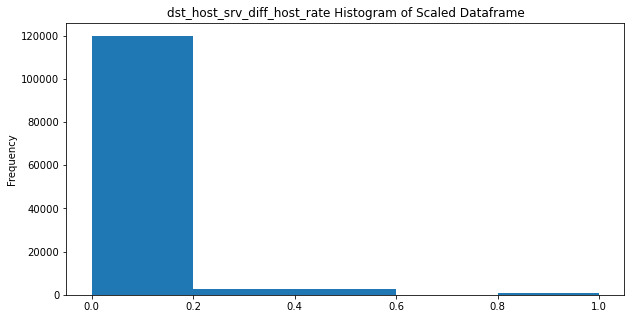

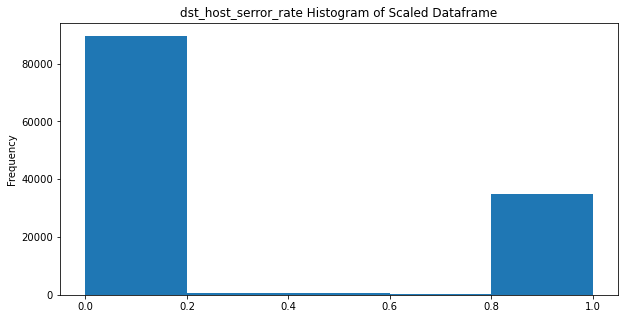

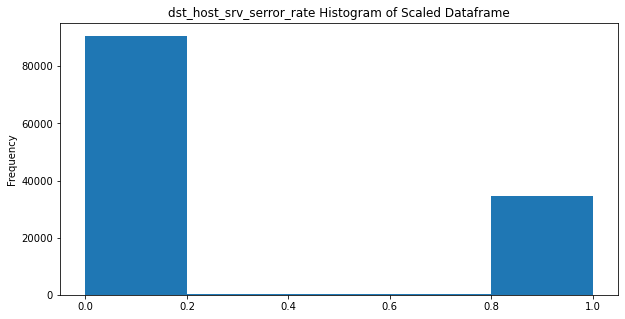

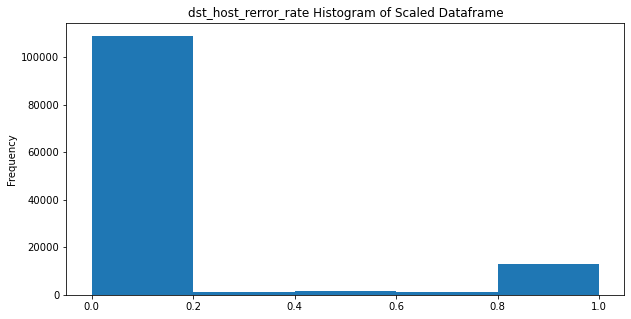

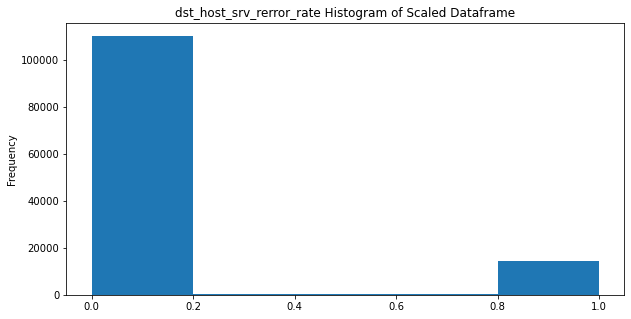

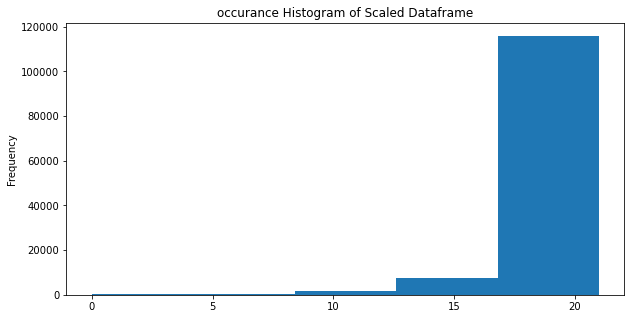

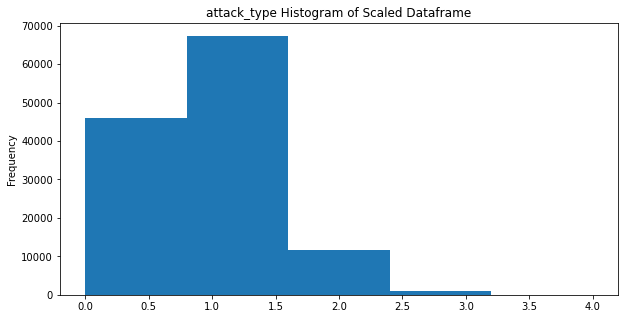

In [52]:
for col in df_scaled.columns:
    plt.figure(figsize=(10,5))
    plt.hist(df[col],bins=5)
    plt.ylabel("Frequency")
    plt.title(col +" Histogram of Scaled Dataframe")
    plt.show()

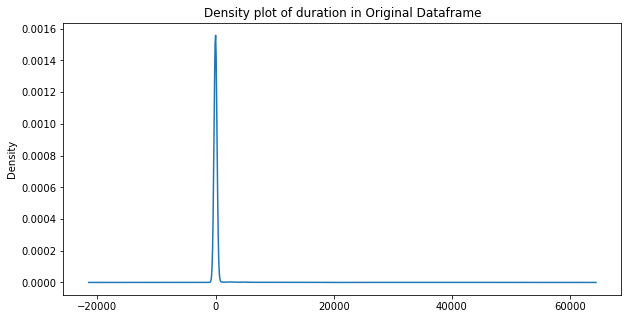

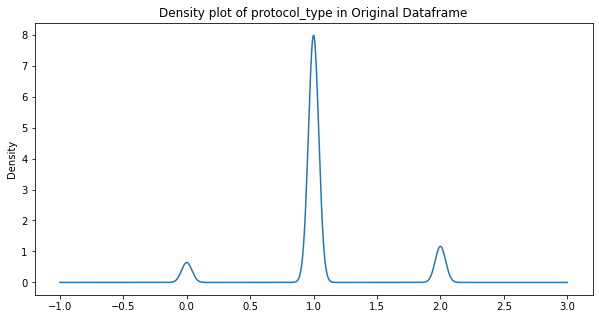

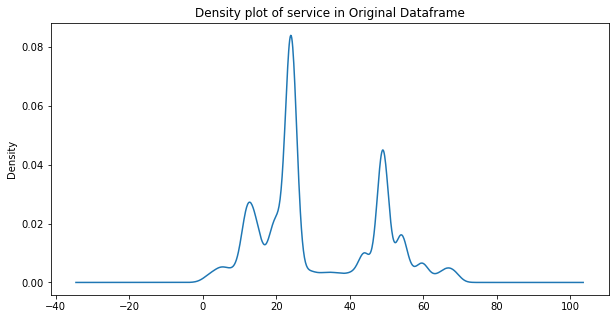

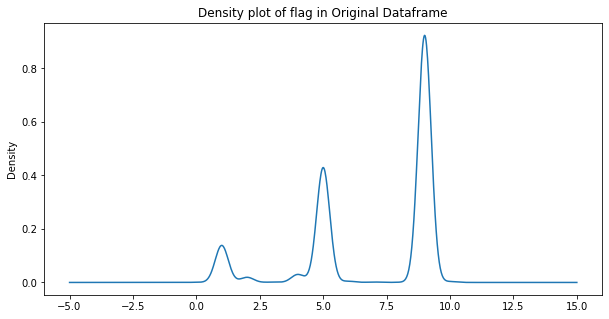

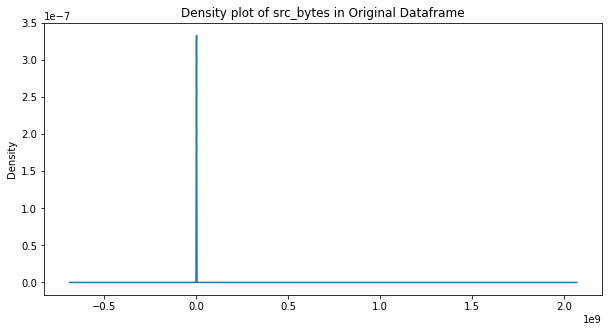

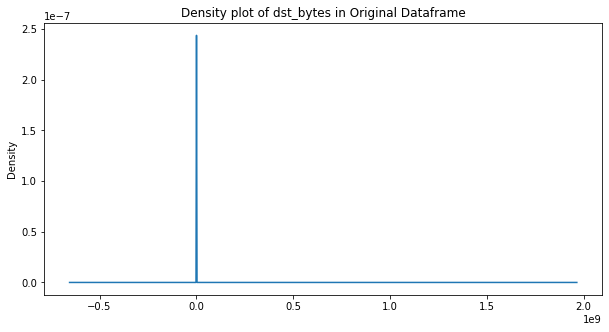

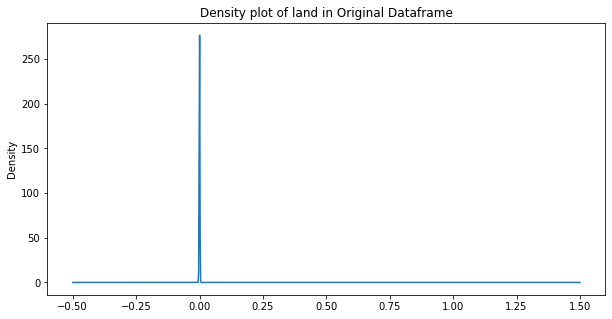

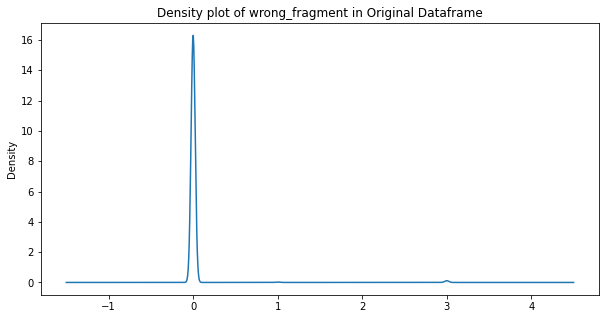

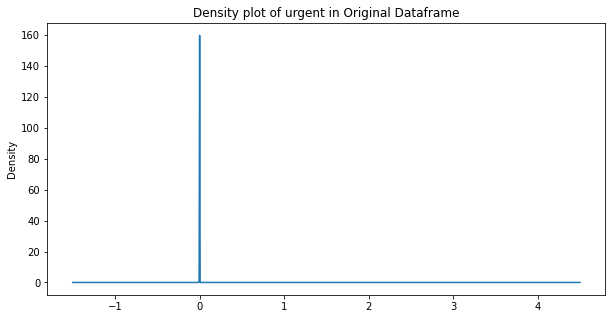

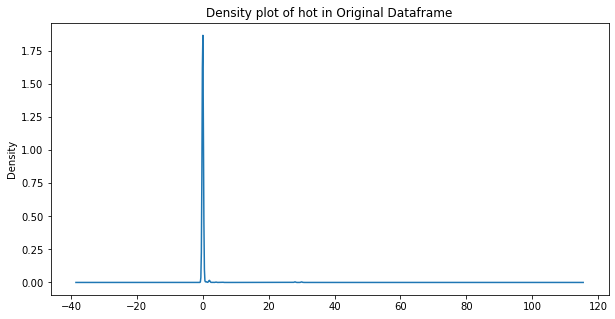

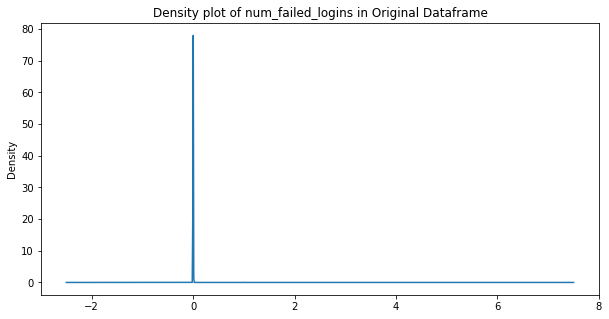

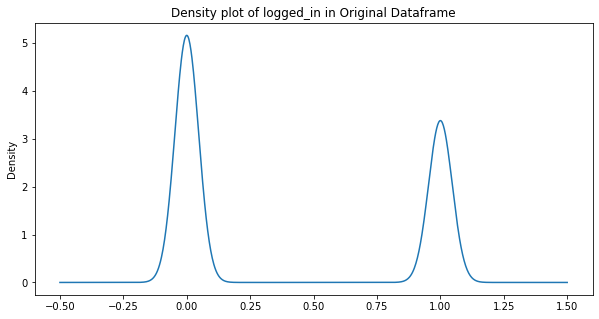

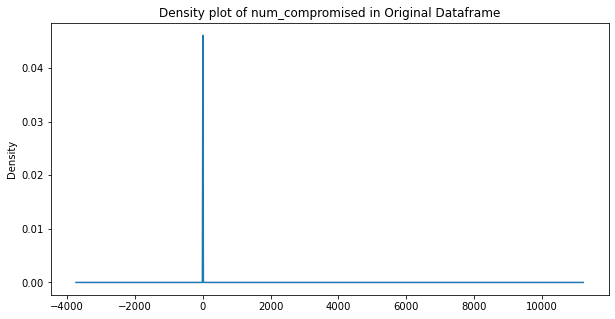

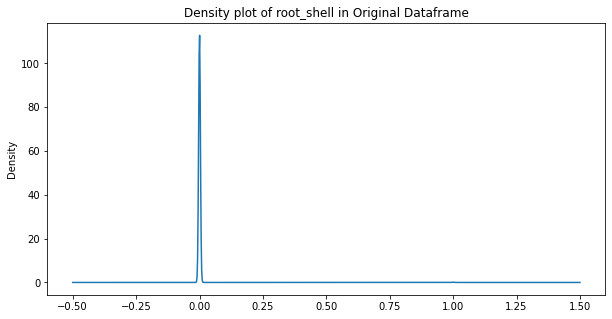

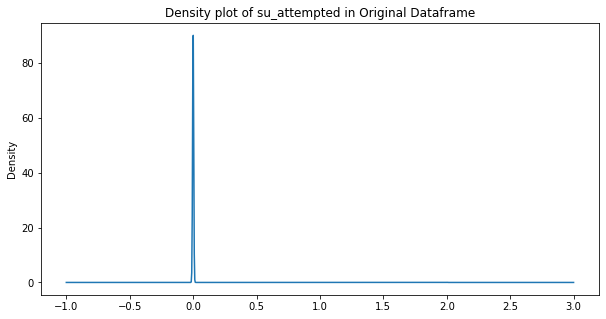

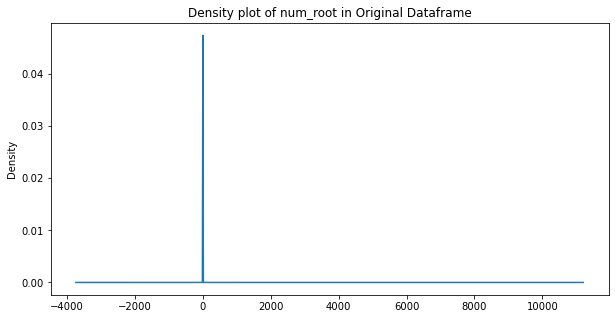

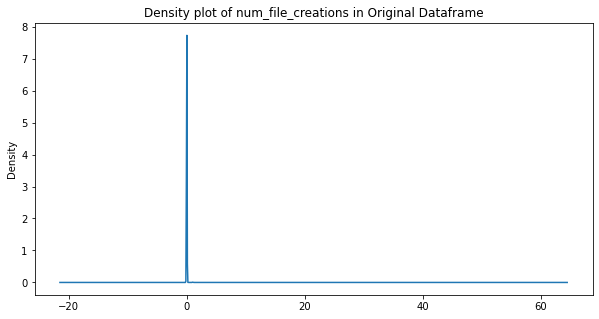

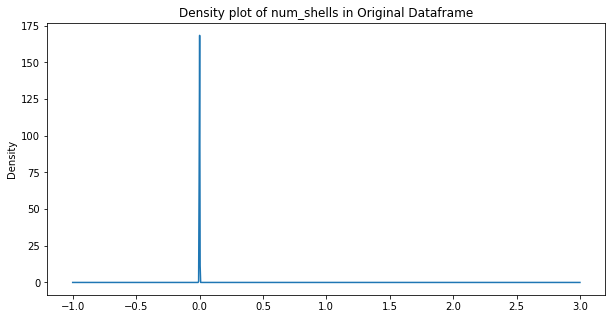

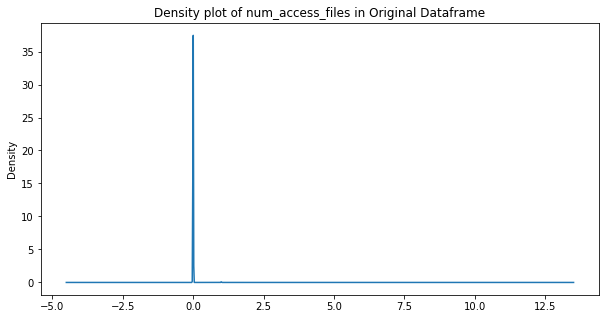

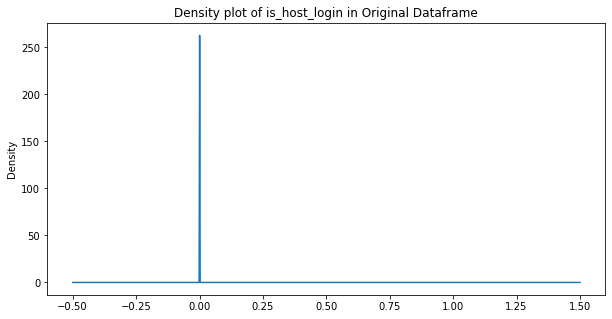

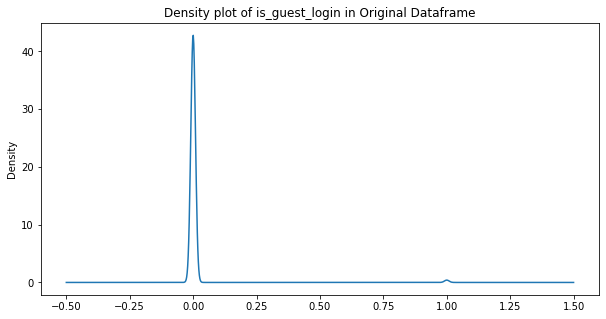

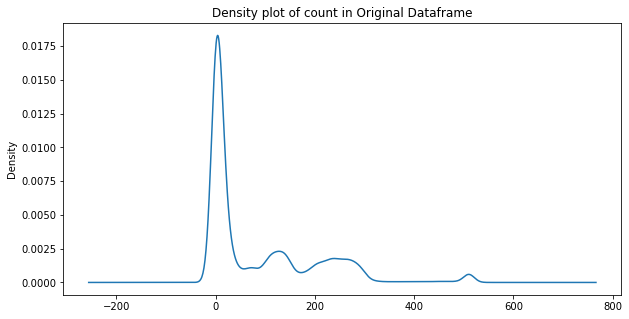

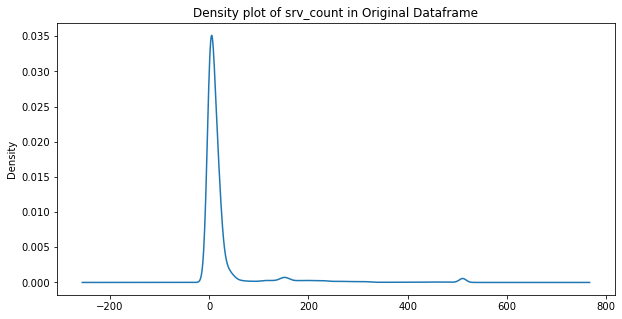

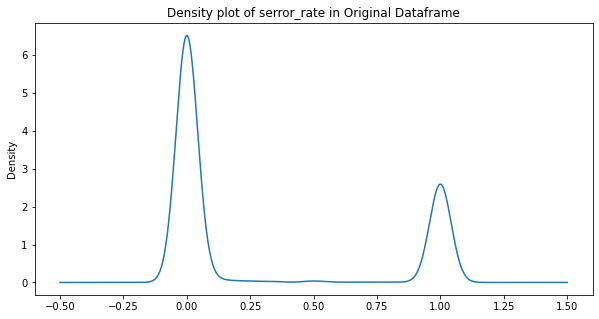

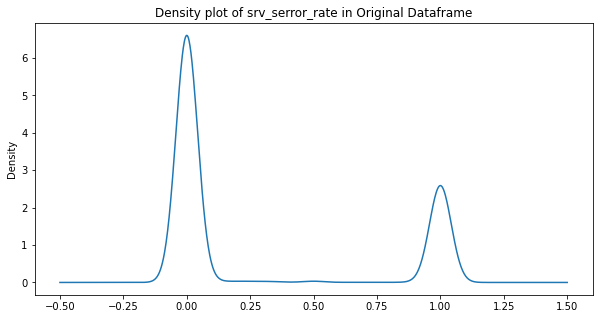

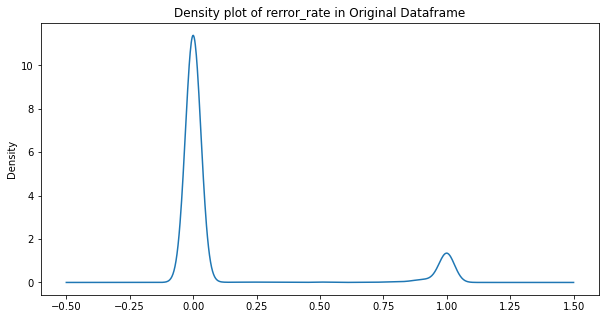

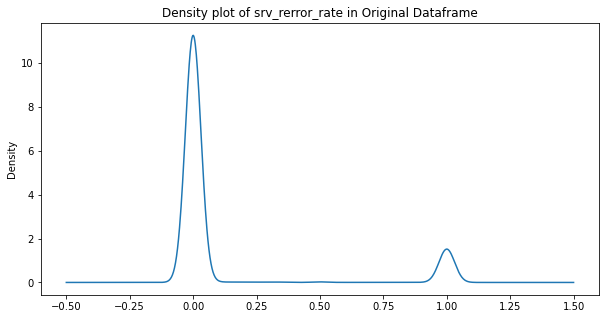

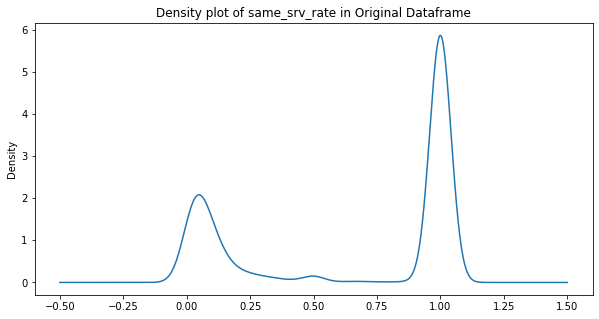

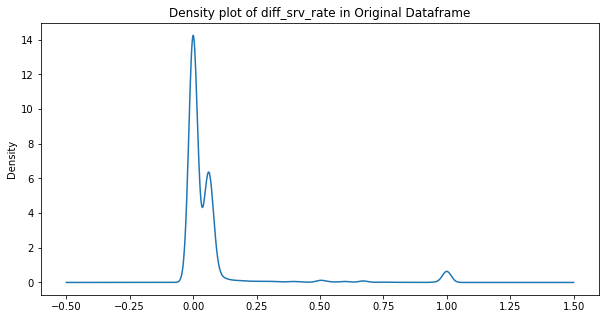

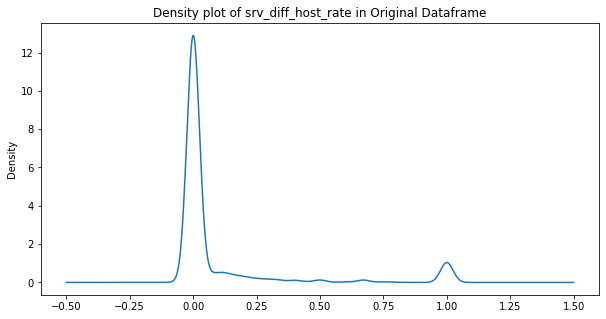

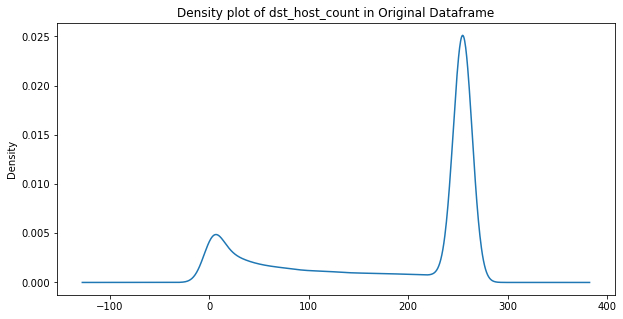

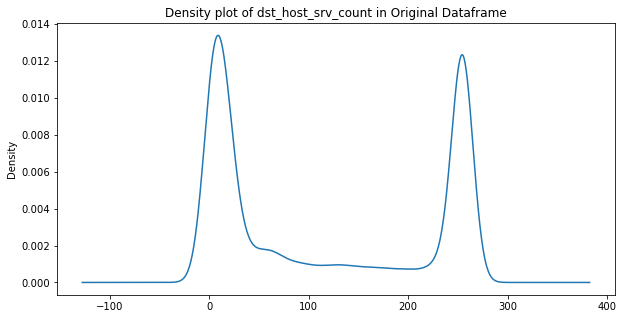

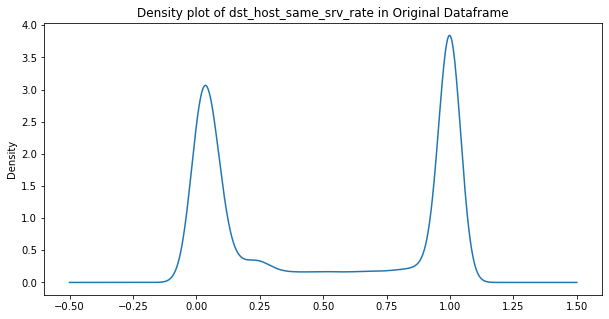

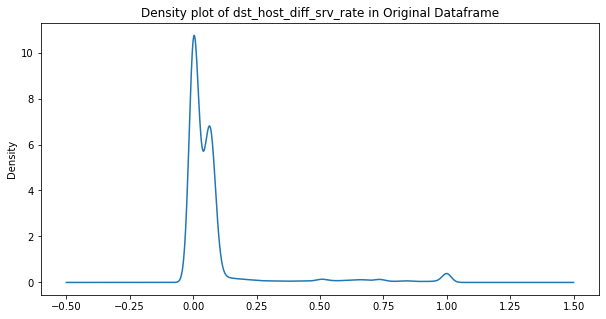

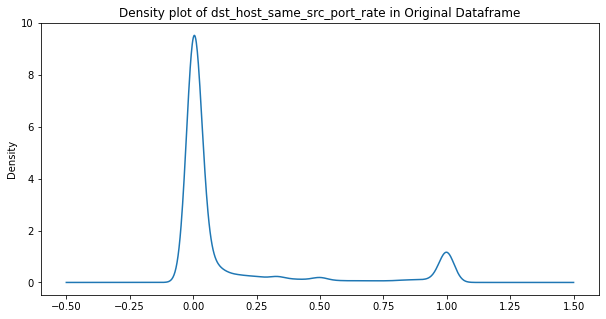

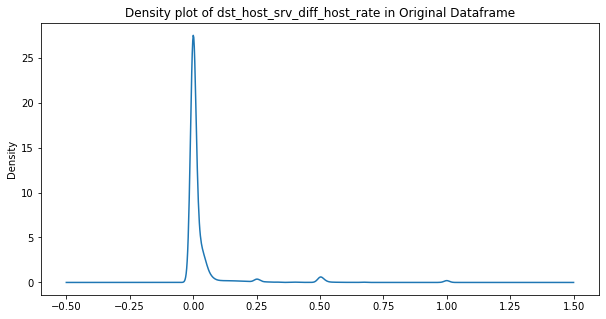

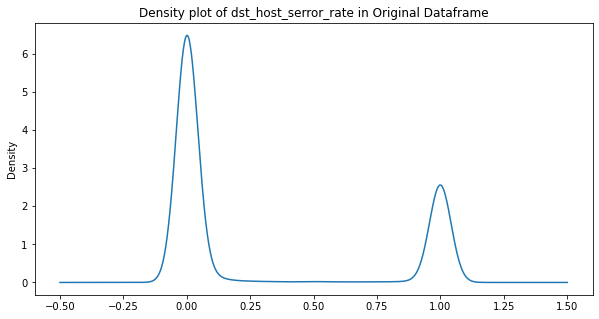

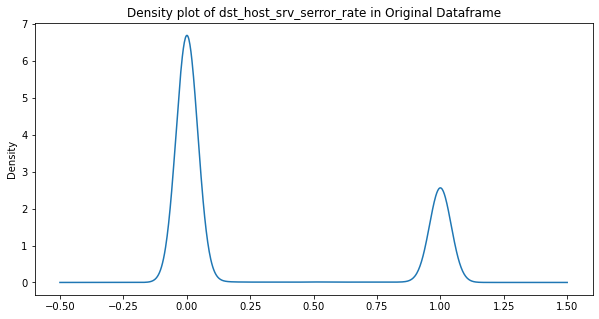

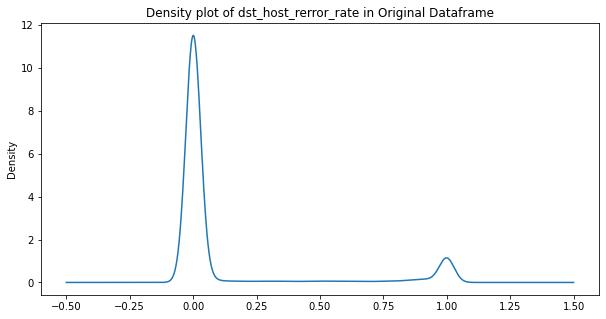

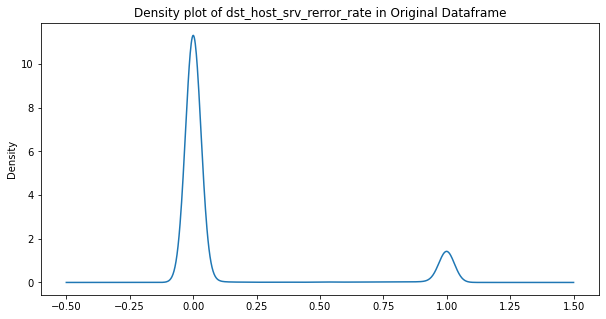

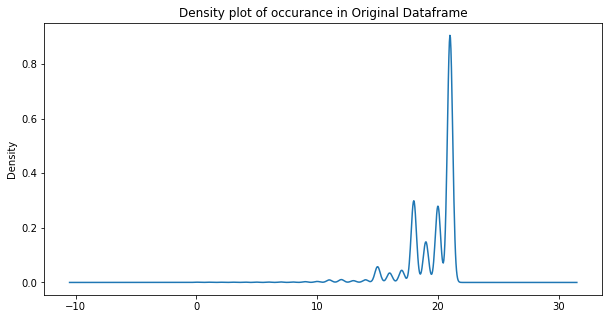

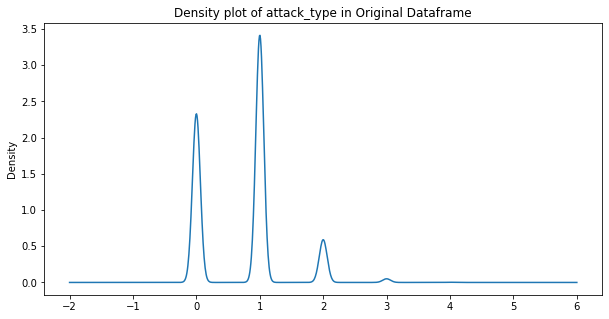

In [53]:
for col in df.columns:
    plt.figure(figsize=(10,5))
    plt.title(f'Density plot of {col} in Original Dataframe')
    df[col].plot(kind='density')
    plt.show()

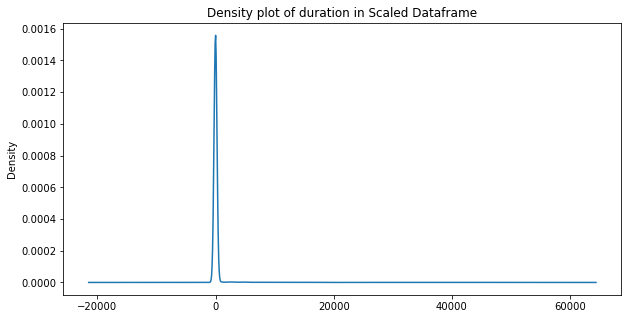

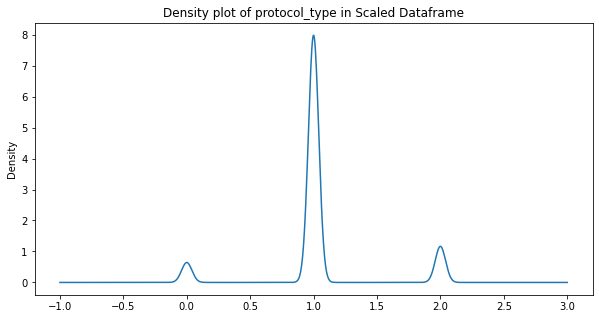

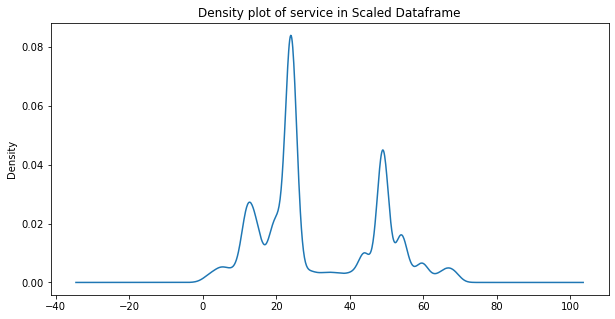

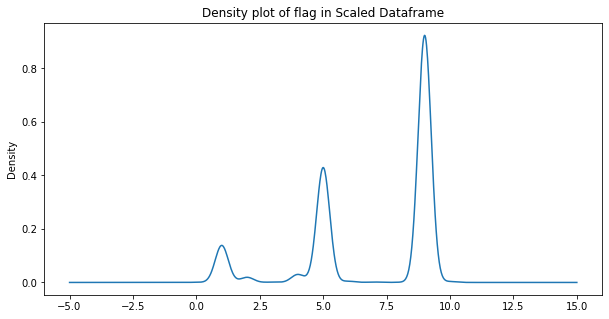

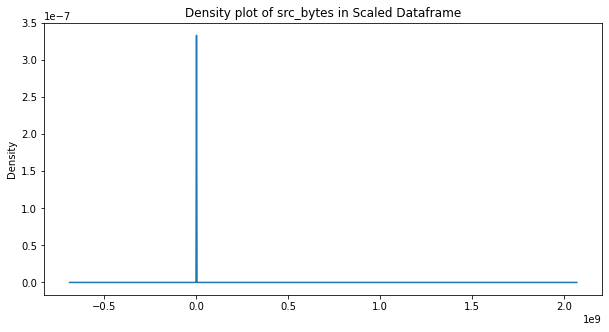

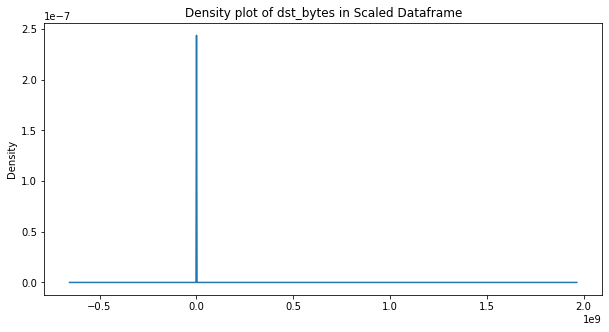

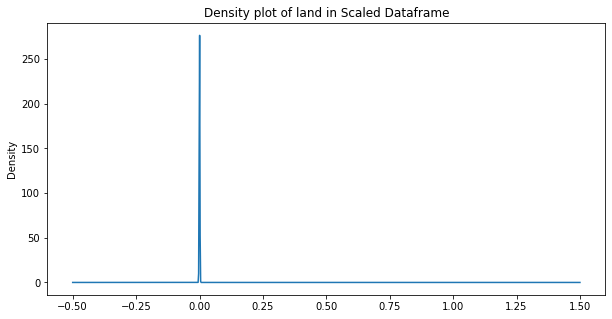

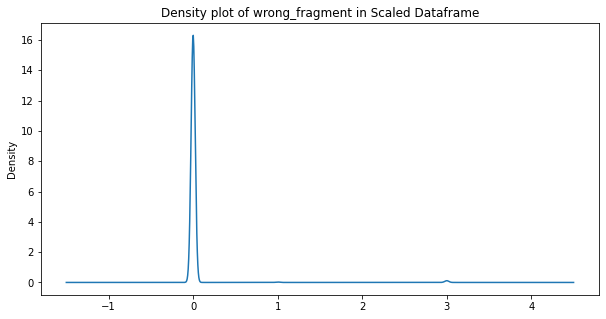

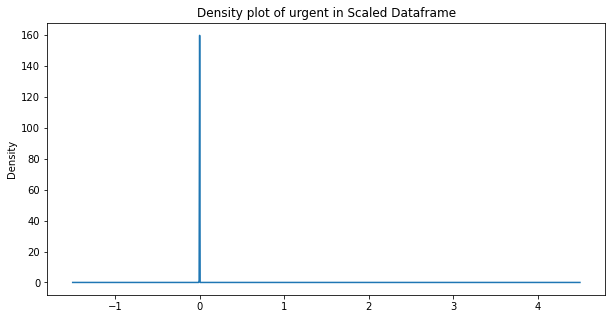

KeyboardInterrupt: 

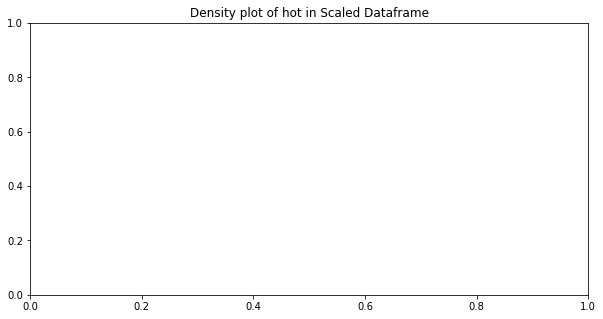

In [54]:
for col in df_scaled.columns:
    plt.figure(figsize=(10,5))
    plt.title(f'Density plot of {col} in Scaled Dataframe')
    df[col].plot(kind='density')
    plt.show()

Outliers

In [ ]:
for col in df.columns:
    plt.figure(figsize=(10,5))
    plt.boxplot(df[col])
    plt.title(f'Box plot of {col} in Original Dataframe')
    plt.show()

In [ ]:
for col in df_scaled.columns:
    plt.figure(figsize=(10,5))
    plt.boxplot(df[col])
    plt.title(f'Box plot of {col} in Scaled Dataframe')
    plt.show()

In [51]:
y = df['attack_type']

In [52]:
X_train, X_test, y_train, y_test =train_test_split(df_scaled,y,test_size=0.3,random_state =0)

In [53]:
X_train.shape

(88174, 42)

In [54]:
X_test.shape

(37790, 42)

In [55]:
corr_matrix = df_scaled.corr()
print(corr_matrix)

                             duration  protocol_type   service      flag  \
duration                     1.000000       0.038230  0.092853 -0.063385   
protocol_type                0.038230       1.000000  0.029821  0.093823   
service                      0.092853       0.029821  1.000000 -0.303977   
flag                        -0.063385       0.093823 -0.303977  1.000000   
src_bytes                    0.070737      -0.000975 -0.001632 -0.008114   
dst_bytes                    0.034878      -0.000609  0.003595 -0.004096   
land                        -0.001553      -0.001760 -0.009953 -0.010372   
wrong_fragment              -0.009867       0.169556  0.084401  0.067220   
urgent                       0.003830      -0.000966  0.010980  0.005811   
hot                          0.000704      -0.011876 -0.064076  0.068444   
num_failed_logins            0.009528      -0.003375  0.033042 -0.006061   
logged_in                   -0.064226      -0.101087 -0.139495  0.589432   
num_compromi

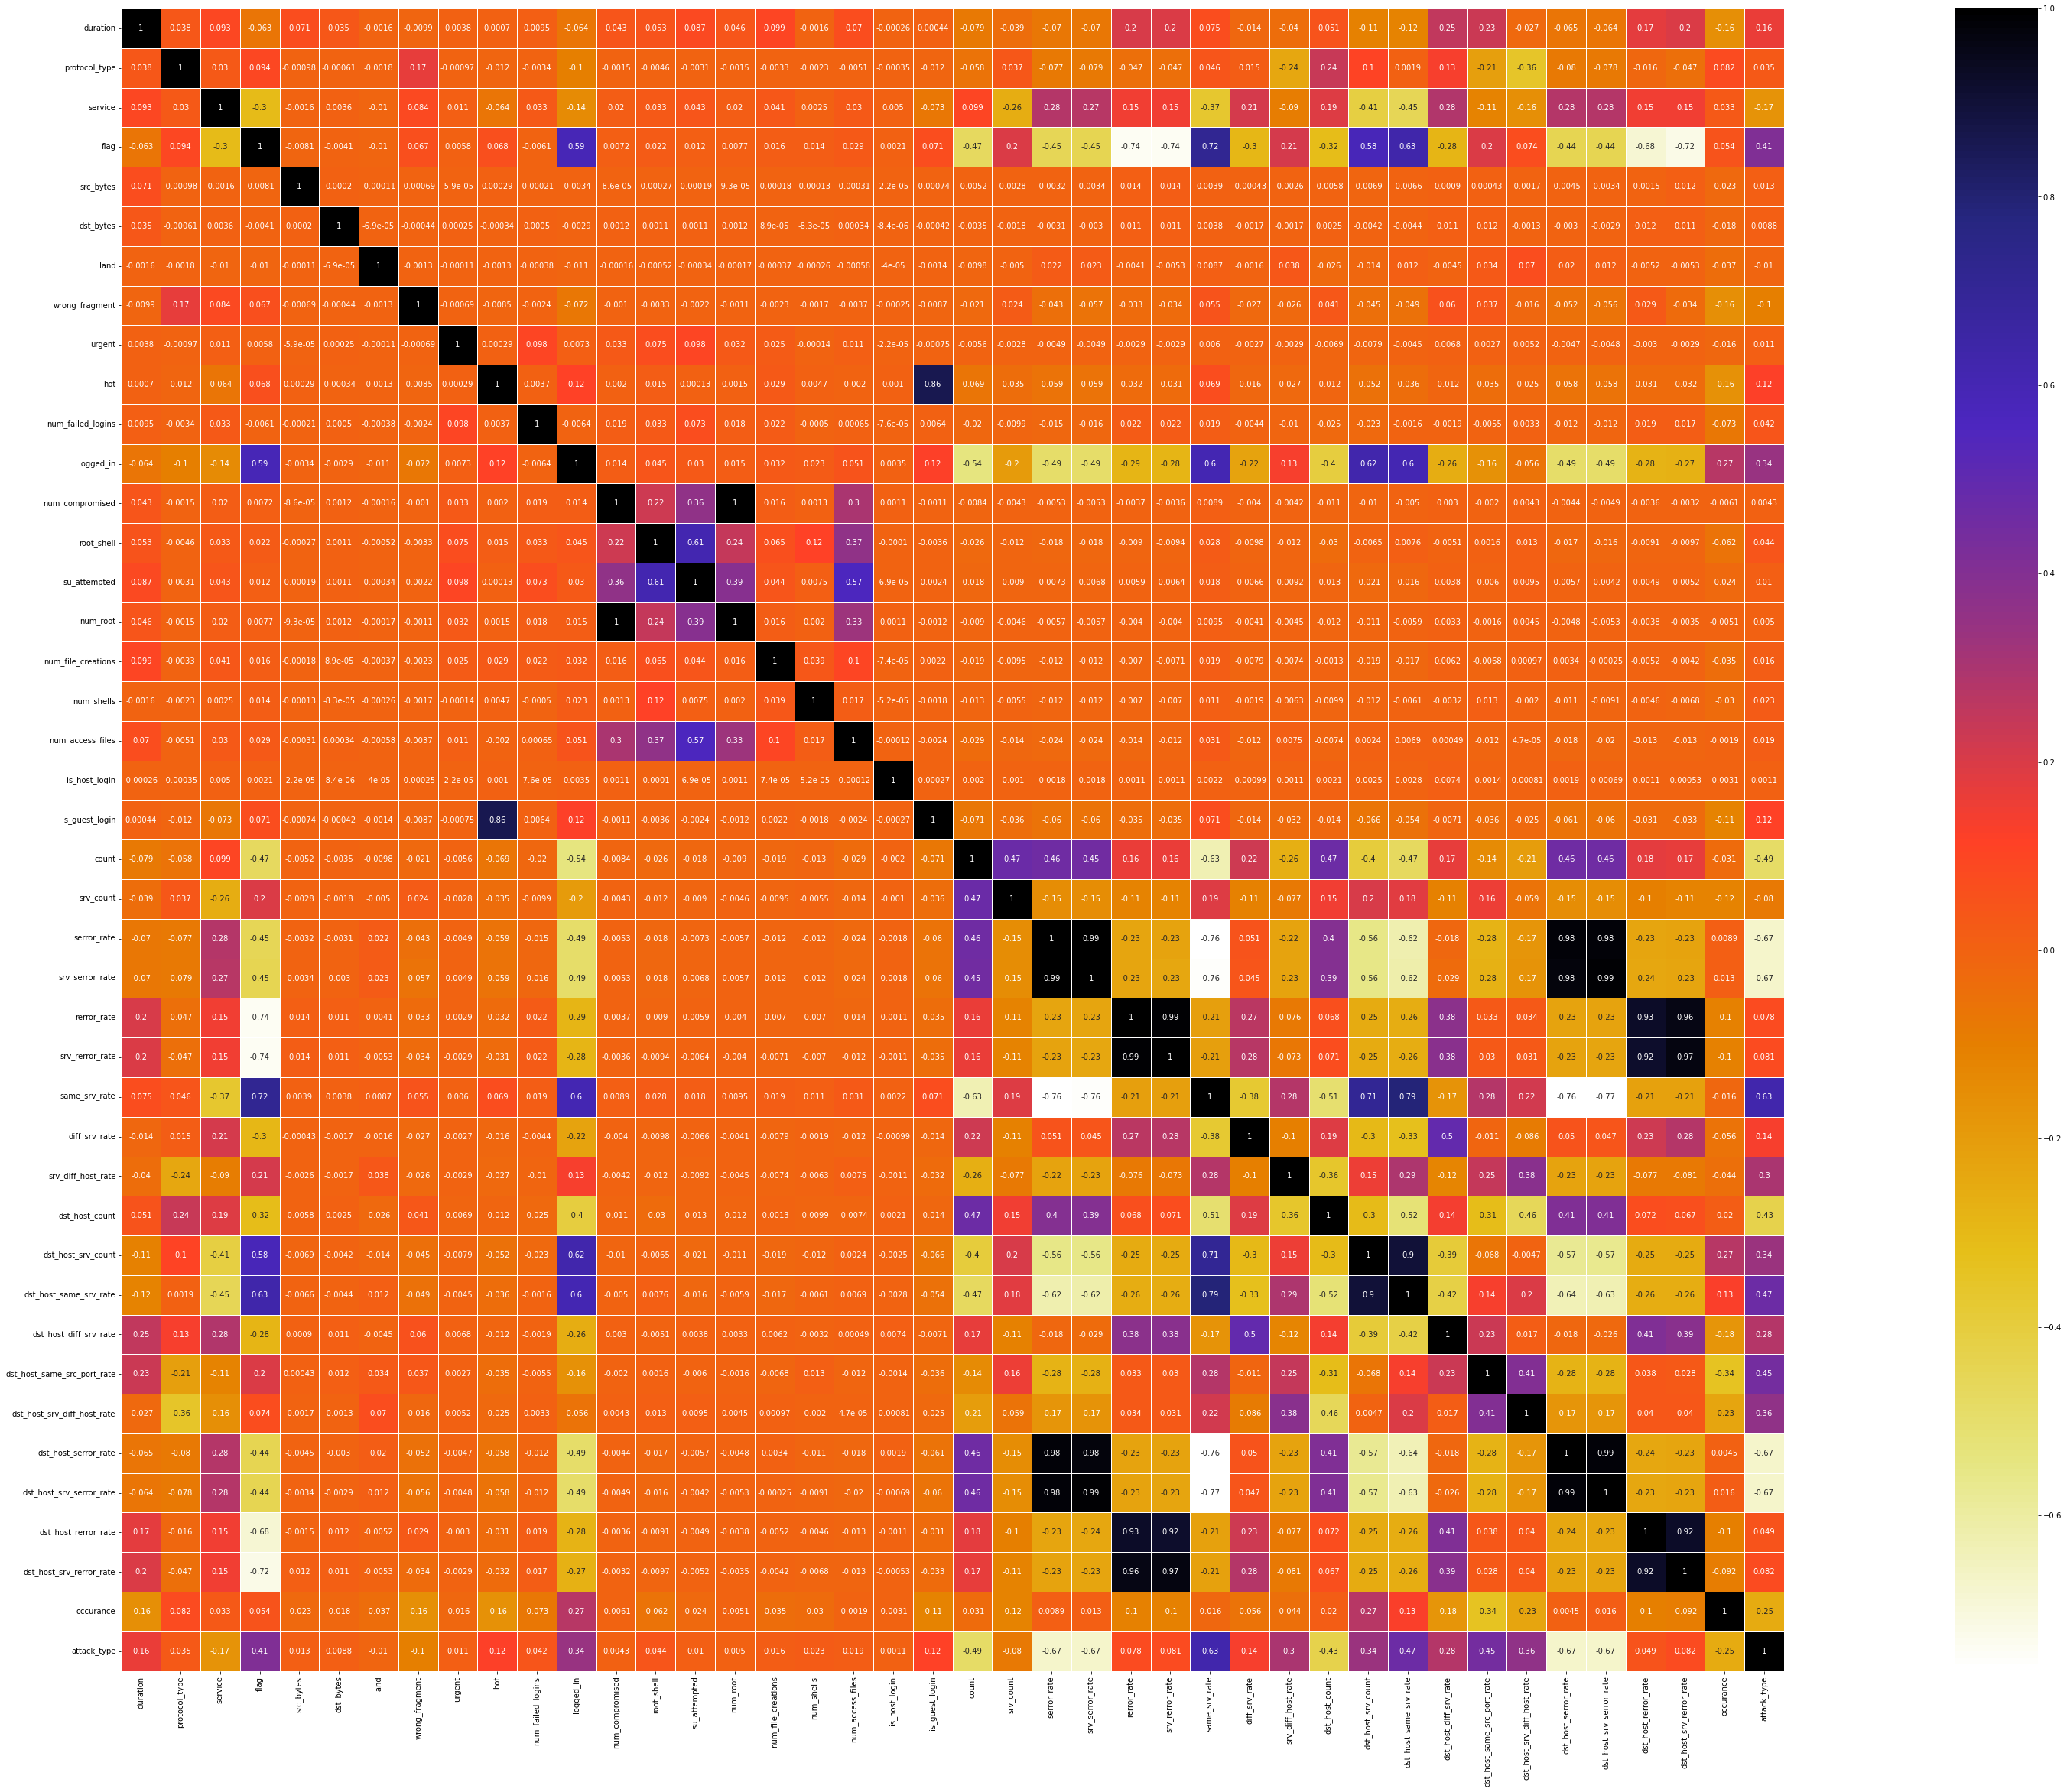

In [56]:
plt.figure(figsize=(80,40))
sns.heatmap(corr_matrix, annot= True,cmap = plt.cm.CMRmap_r,square=True, linewidth =.5)
plt.show()

In [57]:
target_col = 'attack_type'
corr_with_target = corr_matrix[target_col]
relevant_features = corr_with_target[abs(corr_with_target) > 0.4].index.tolist()
print(relevant_features)

['flag', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'attack_type']


In [58]:
relevant_features.remove(target_col)

In [59]:
X_train_new = X_train.drop(relevant_features,axis=1)
X_test_new = X_test.drop(relevant_features,axis=1)

In [60]:
X_train_new.shape

(88174, 32)

In [61]:
X_test_new.shape

(37790, 32)

In [62]:
X_train_new.columns

Index(['duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes',
       'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'srv_count', 'rerror_rate',
       'srv_rerror_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'occurance', 'attack_type'],
      dtype='object')

In [63]:
X_test_new.columns

Index(['duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes',
       'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'srv_count', 'rerror_rate',
       'srv_rerror_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'occurance', 'attack_type'],
      dtype='object')

# KNN

In [64]:
k = []

In [65]:
k.append(3)
knn3 = KNeighborsClassifier(n_neighbors=3)
k.append(5)
knn5 = KNeighborsClassifier(n_neighbors=5)
k.append(7)
knn7 = KNeighborsClassifier(n_neighbors=7)

In [66]:
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [67]:
print(np.sum(np.isnan(y_train)))

0


In [68]:
print(np.sum(np.isnan(X_train_new)))

duration                       0
protocol_type                  0
service                        0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
srv_count                      0
rerror_rate                    0
srv_rerror_rate                0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_srv_count             0
dst_host_diff_srv_rate         0
dst_host_srv_diff_host_rate    0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
occurance 

In [69]:
knn3.fit(X_train_new, y_train)
knn5.fit(X_train_new, y_train)
knn7.fit(X_train_new, y_train)

KNeighborsClassifier(n_neighbors=7)

In [70]:
print(np.sum(np.isnan(X_test_new)))

duration                       0
protocol_type                  0
service                        0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
srv_count                      0
rerror_rate                    0
srv_rerror_rate                0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_srv_count             0
dst_host_diff_srv_rate         0
dst_host_srv_diff_host_rate    0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
occurance 

In [71]:
X_test_new = X_test_new.dropna()

In [72]:
y_pred3 = knn3.predict(X_test_new)
y_pred5 = knn5.predict(X_test_new)
y_pred7 = knn7.predict(X_test_new)

In [73]:
accuracy = []

In [74]:
#For K = 3

accuracy.append(accuracy_score(y_test.round(), y_pred3.round(), normalize=False))

print("Accuracy:", accuracy)

Accuracy: [37770]


In [75]:
#For K = 5

accuracy.append(accuracy_score(y_test.round(), y_pred5.round(), normalize=False))

print("Accuracy:", accuracy)

Accuracy: [37770, 37757]


In [76]:
#For K = 7

accuracy.append(accuracy_score(y_test.round(), y_pred7.round(), normalize=False))

print("Accuracy:", accuracy)

Accuracy: [37770, 37757, 37756]


In [77]:
k

[3, 5, 7]

In [78]:
accuracy

[37770, 37757, 37756]

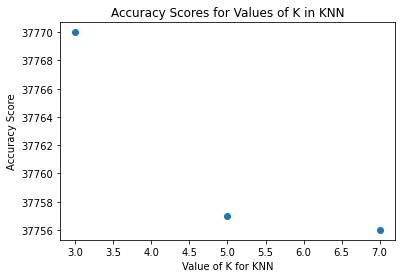

In [79]:
plt.scatter(k, accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of K in KNN')
plt.show()

# Decision Tree


In [80]:
ent = tree.DecisionTreeClassifier(criterion="entropy")

In [81]:
gin = tree.DecisionTreeClassifier(criterion="gini")

In [82]:
ent.fit(X_train_new, y_train)

DecisionTreeClassifier(criterion='entropy')

In [83]:
gin.fit(X_train_new, y_train)

DecisionTreeClassifier()

In [84]:
y_pred_ent = ent.predict(X_test_new)

In [85]:
y_pred_gin = gin.predict(X_test_new)

In [86]:
acc_ent = accuracy_score(y_test, y_pred_ent)

print("Entropy Accuracy:", acc_ent)

Entropy Accuracy: 1.0


In [87]:
acc_gin = accuracy_score(y_test, y_pred_gin)

print("Gini Accuracy:", acc_gin)

Gini Accuracy: 1.0


In [88]:
rep_ent = classification_report(y_test, y_pred_ent)

print(rep_ent)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13781
           1       1.00      1.00      1.00     20232
           2       1.00      1.00      1.00      3475
           3       1.00      1.00      1.00       290
           4       1.00      1.00      1.00        12

    accuracy                           1.00     37790
   macro avg       1.00      1.00      1.00     37790
weighted avg       1.00      1.00      1.00     37790



In [89]:
rep_gin = classification_report(y_test, y_pred_gin)

print(rep_gin)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13781
           1       1.00      1.00      1.00     20232
           2       1.00      1.00      1.00      3475
           3       1.00      1.00      1.00       290
           4       1.00      1.00      1.00        12

    accuracy                           1.00     37790
   macro avg       1.00      1.00      1.00     37790
weighted avg       1.00      1.00      1.00     37790



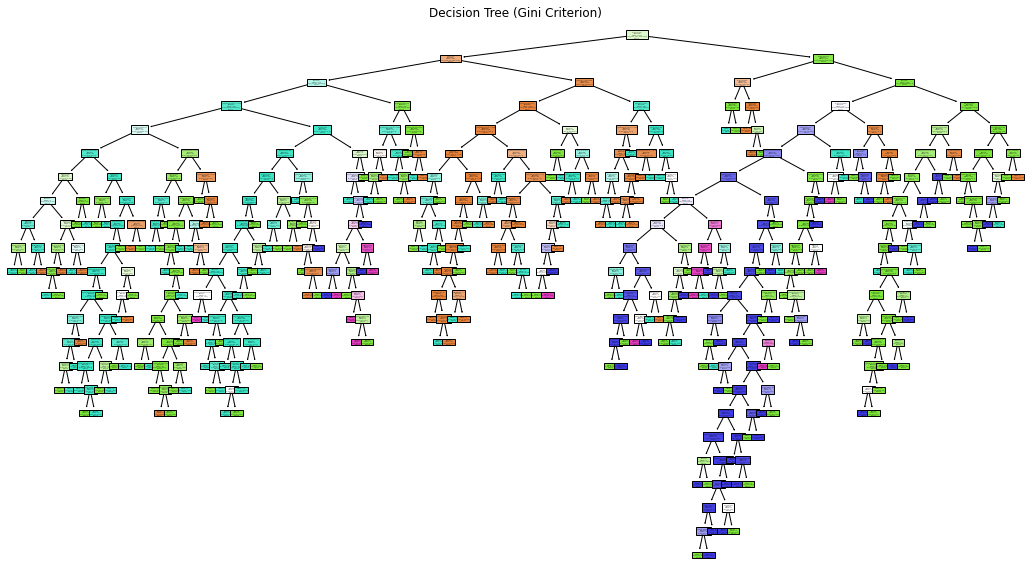

In [90]:
X = df.drop('attack_type', axis=1)
y = df['attack_type']
a = X.columns

plt.figure(figsize=(40,10))
plt.subplot(1, 2, 1)

clf = DecisionTreeClassifier()
clf.fit(X, y)
tree.plot_tree(clf, feature_names=a, class_names=y.astype(str).unique(), filled=True)
plt.title("Decision Tree (Gini Criterion)")

plt.show()


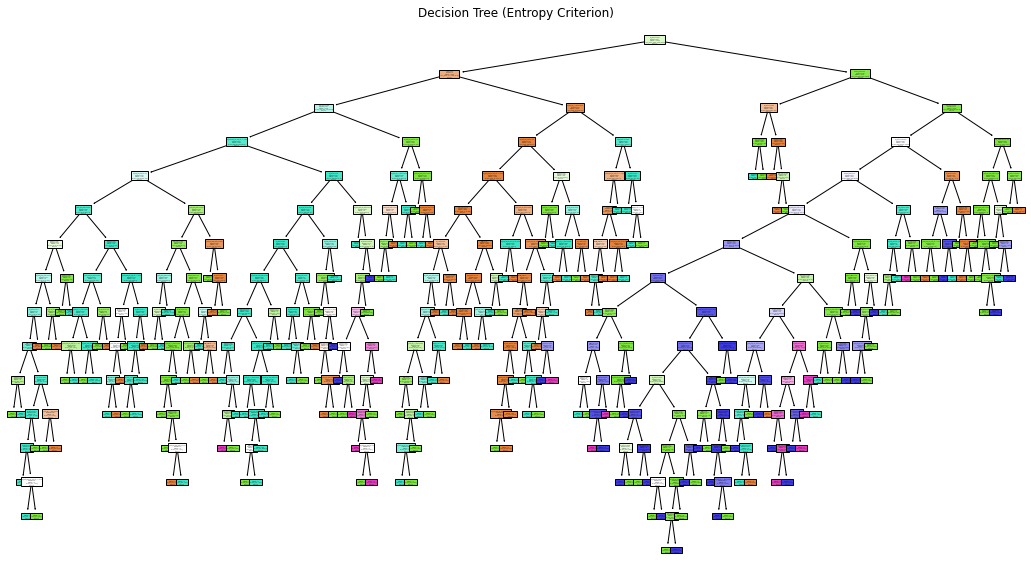

In [91]:
X = df.drop('attack_type', axis=1)
y = df['attack_type']
a = X.columns

plt.figure(figsize=(40,10))
plt.subplot(1, 2, 1)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)
tree.plot_tree(clf, feature_names=a, class_names=y.astype(str).unique(), filled=True)
plt.title("Decision Tree (Entropy Criterion)")

plt.show()


#ANN


In [92]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [93]:
mlp.fit(X_train_new, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [94]:
y_pred = mlp.predict(X_test_new)

In [95]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [96]:
print("Before Fine Tuning")
print("Accuracy: ", accuracy)
print("Precision Score: ", precision)
print("Recall Score: ",recall)
print("F1 Score: ",f1)

Before Fine Tuning
Accuracy:  0.9997618417570786
Precision Score:  0.9997555386872086
Recall Score:  0.9997618417570786
F1 Score:  0.9997581792615621


In [97]:
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

In [98]:
grid_search = GridSearchCV(mlp, param_grid, cv=5)

In [99]:
grid_search.fit(X_train_new, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000,
                                     random_state=42),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10),
                                                (50, 50), (100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [100]:
print("After Fine Tuning")
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)


After Fine Tuning
Best hyperparameters: {'activation': 'identity', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best accuracy score: 0.9998752467999177


In [103]:
new_y_pred = grid_search.predict(X_test_new)


In [104]:
print(new_y_pred)

[0 1 1 ... 1 1 1]


In [105]:
accuracy = accuracy_score(y_test, new_y_pred)
precision = precision_score(y_test, new_y_pred,average='weighted')
recall = recall_score(y_test, new_y_pred,average='weighted')
f1 = f1_score(y_test, new_y_pred,average='weighted')


In [106]:
print("After Fine Tuning")
print("Accuracy of Fine-Tuned MLP: ", accuracy)
print("Precision Score of Fine-Tuned MLP: ", precision)
print("Recall Score of Fine-Tuned MLP: ",recall)
print("F1 Score of Fine-Tuned MLP: ",f1)

After Fine Tuning
Accuracy of Fine-Tuned MLP:  0.9998412278380524
Precision Score of Fine-Tuned MLP:  0.9998431177364935
Recall Score of Fine-Tuned MLP:  0.9998412278380524
F1 Score of Fine-Tuned MLP:  0.999841580540142


# Clustering

In [107]:
k = 2

In [122]:
cluster = df.drop(columns=['attack_type'])


In [123]:
cluster.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'occurance'],
      dtype='object')

In [113]:
selector = SelectKBest(f_classif, k=k)


In [139]:
x = cluster
y = df['attack_type']

In [149]:
new_X = selector.fit(x,y)
data = selector.transform(cluster)

In [141]:
best_feature = np.array(x.columns)[selector.get_support()]


In [143]:
print("Top Features: ",best_features)

Top Features:  Index(['num_failed_logins', 'rerror_rate'], dtype='object')


In [144]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,max_iter=300, random_state=0)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

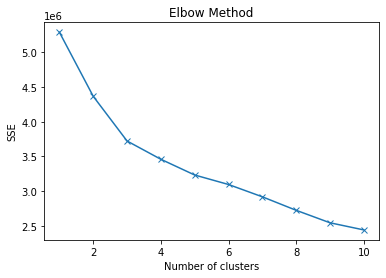

In [148]:
number_of_clusters=range (1,11)
plt.plot(number_of_clusters,sse,marker='x')
plt.title('Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [146]:
new_k = 5

In [150]:
kmeans = KMeans(n_clusters=new_k,max_iter=300, random_state=0)
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [151]:
labels = kmeans.labels_

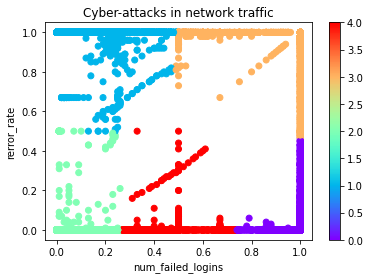

In [152]:
scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
plt.xlabel(best_features[0])
plt.ylabel(best_features[1])
plt.title('Cyber-attacks in network traffic')
plt.colorbar(scatter)
plt.show()